In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna

import random
import numpy as np
import torch

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
import numpy as np
import time

from torch.utils.data import Dataset, DataLoader, random_split


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Using device: cuda


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import random
import numpy as np

# If using PyTorch
import torch

# If using TensorFlow

# Optional: If using Python hash-based functions
os.environ["PYTHONHASHSEED"] = "42"

# Set seed for base Python random
random.seed(42)

# Set seed for NumPy
np.random.seed(42)

# Set seed for PyTorch (CPU and GPU)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)  # if using multi-GPU

# Force deterministic behavior in PyTorch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [3]:
# # Manual FASTA parsing (without Biopython)
# fasta_path = "../data//naturalAMPs_APD2024a-ADAM.fasta.txt"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/naturalAMPs_APD2024a-ADAM.csv", index=False)


# Manual FASTA parsing (without Biopython)
# fasta_path = "../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta.csv", index=False)



# fasta_path = "../data/uniprotkb_length_5_TO_30_NOT_antimicrob_2025_04_14.fasta (1)"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta1.csv", index=False)

## Data

In [4]:
# from Bio import SeqIO

# def read_fasta_sequences(fasta_path):
#     """
#     Reads sequences from a FASTA file and returns them as a list of strings.

#     Args:
#         fasta_path (str): Path to the FASTA file.

#     Returns:
#         List[str]: A list of amino acid or nucleotide sequences as strings.
#     """
#     sequences = [str(record.seq) for record in SeqIO.parse(fasta_path, "fasta")]
#     return sequences

In [5]:
dbbasp = pd.read_csv("../models1/database_check/DBAASP_peptides.csv")
dbbasp = dbbasp[dbbasp["SEQUENCE"].str.len() >= 10]
dbbasp = dbbasp[~dbbasp["TARGET GROUP"].str.contains("Fungus", na=False)]
dbbasp = dbbasp[["ID", "SEQUENCE"]]
dbbasp.columns = ["Peptide ID", "Sequence"]
adam_df = pd.read_csv("../data/naturalAMPs_APD2024a-ADAM.csv")
adam_df = pd.concat([adam_df, dbbasp], ignore_index=True)
uniprot_df = pd.read_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta.csv")
uniprot_df1 = pd.read_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta1.csv")
uniprot_df2 = pd.read_csv("/mnt/storageG1/lwang/Projects/TB-AMP-design/data/uniprotkb_length_5_TO_30_NOT_antimicrob_2025_04_23 (1).tsv", sep="\t")
uniprot_df2
uniprot_df2 = uniprot_df2[['Entry', 'Sequence']]
uniprot_df2.columns = ["Peptide ID", "Sequence"]
uniprot_df = pd.concat([uniprot_df, uniprot_df1, uniprot_df2], ignore_index=True)

In [6]:
uniprot_df = uniprot_df[uniprot_df['Sequence'].apply(lambda s: isinstance(s, str) and len(s) >= 10)]
uniprot_df = uniprot_df.drop_duplicates(subset="Sequence")
uniprot_df

,Peptide ID,Sequence
0,tr|A0A009HCC0|A0A009HCC0_9GAMM Acyl carrier pr...,MSDIEQRVKQAVAEQLGLKAEEIKNEASFMDDLGADSLDLVELVMS...
6,tr|A0A009YF97|A0A009YF97_9GAMM Acyl carrier pr...,MSDIEQRVKQAVAEQLGMKVEEIKNEASFMDDLGADSLDLVELVMS...
8,tr|A0A010SZ96|A0A010SZ96_PSEFL Acyl carrier pr...,MSTIEERVKKIVAEQLGVKEEEVVNTASFVEDLGADSLDTVELVMA...
9,tr|A0A011NAB1|A0A011NAB1_9PAST Acyl carrier pr...,MSIEERVKKIIVDQLGAKAEDVKPEASFIEDLGADSLDTVELVMAL...
10,tr|A0A011NTH9|A0A011NTH9_9PROT DNA-directed RN...,MARVTVDDCLTRIPNRFQMTLAATYRARQITAGASPLIDANRDKPT...
...,...,...
104968,P9WEJ1,MPEQKANCSPNGNITVDSMIMSLGSS
105566,Q6LEB3,LFNKYISRPRRVELAVMLNLTERHIKI
105568,Q6QLL8,VKGFSFKYGNGVWIGRTKSTNSRSGFQ
105789,Q9DTV7,HFPGFGQSLLFGYPVYVFGDCVQGDWCR


In [7]:

# Remove rows where the Sequence is not a string or is shorter than 10 characters
adam_df = adam_df[adam_df['Sequence'].apply(lambda x: isinstance(x, str) and len(x) >= 10)]

190 10
Range of sequence lengths: 180


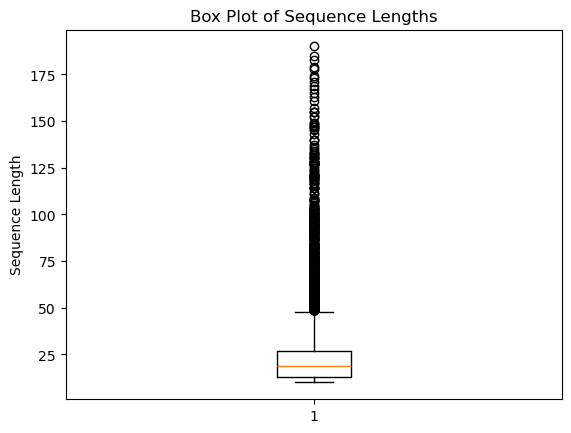

Mean sequence length: 23.215054249547922
Median sequence length: 19.0
Standard deviation of sequence lengths: 15.467236594869847


In [8]:
import matplotlib.pyplot as plt

# Calculate sequence lengths
sequence_lengths = adam_df['Sequence'].apply(len)

# Calculate the range of sequence lengths
length_range = sequence_lengths.max() - sequence_lengths.min()
print(sequence_lengths.max(),sequence_lengths.min())
print(f"Range of sequence lengths: {length_range}")

# Draw a box plot
plt.boxplot(sequence_lengths)
plt.title("Box Plot of Sequence Lengths")
plt.ylabel("Sequence Length")
plt.show()

# Calculate and display distribution statistics
mean_length = sequence_lengths.mean()
median_length = sequence_lengths.median()
std_dev_length = sequence_lengths.std()

print(f"Mean sequence length: {mean_length}")
print(f"Median sequence length: {median_length}")
print(f"Standard deviation of sequence lengths: {std_dev_length}")

# adam_df = adam_df.drop(columns=['Sequence Length'])

/tmp/ipykernel_58668/679251586.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_uniprot_df = uniprot_df.groupby('Sequence Length', group_keys=False).apply(


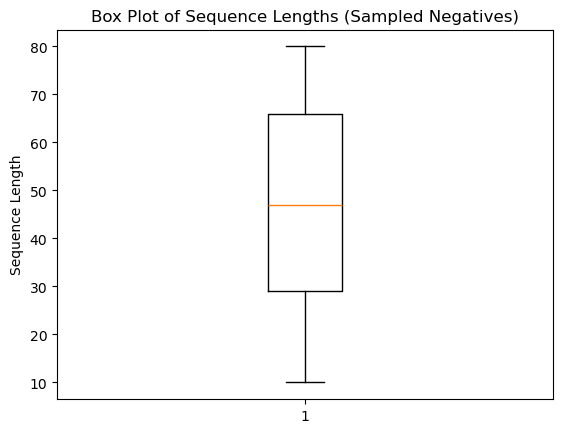

                                              Peptide ID  \
0      sp|C0HJE2|AMYG_BACLI Glucoamylase (Fragment) O...   
1      sp|Q03367|PSBF_CAPAN Cytochrome b559 subunit b...   
2      sp|Q10997|SPI_HALRO Serine proteinase inhibito...   
3      sp|P85962|RLA2_PSEMZ Large ribosomal subunit p...   
4      sp|P02728|GLEM_HUMAN Erythrocyte membrane glyc...   
...                                                  ...   
15376  tr|A0A497J933|A0A497J933_9ARCH DNA-directed RN...   
15377  tr|Q6Q0P4|Q6Q0P4_POLCT Cytochrome c oxidase su...   
15378  tr|A0A2J4G6H0|A0A2J4G6H0_9CREN DNA-directed RN...   
15379  tr|A0A327J0Z7|A0A327J0Z7_9BACT ATP synthase su...   
15380  tr|A0A0G2F2K3|A0A0G2F2K3_PHACM U6 snRNA-associ...   

                                                Sequence  
0                                             SSNKLTTSWG  
1                                             SISAMQFIQR  
2                                             TKKDGEEKVA  
3                                          

In [9]:
# Calculate sequence lengths for uniprot_df
uniprot_df['Sequence Length'] = uniprot_df['Sequence'].apply(len)

# Calculate sequence lengths for adam_df
adam_df['Sequence Length'] = adam_df['Sequence'].apply(len)

# Perform stratified sampling to select more samples
default_min_samples = 30

# Perform lenient stratified sampling
sampled_uniprot_df = uniprot_df.groupby('Sequence Length', group_keys=False).apply(
    lambda x: x.sample(
        n=min(
            len(x), 
            int(14 * adam_df['Sequence Length'].value_counts().get(x.name, default_min_samples))
        ),
        random_state=42
    )
).reset_index(drop=True)
# Drop the 'Sequence Length' column after sampling
sampled_uniprot_df = sampled_uniprot_df.drop(columns=['Sequence Length'])
adam_df = adam_df.drop(columns=['Sequence Length'])

# Draw a box plot to visualize the distribution
plt.boxplot(sampled_uniprot_df['Sequence'].apply(len))
plt.title("Box Plot of Sequence Lengths (Sampled Negatives)")
plt.ylabel("Sequence Length")
plt.show()

print(sampled_uniprot_df)

### data organization

In [10]:
adam_df['label'] = 1
sampled_uniprot_df['label'] = 0
adam_df.columns = ["Peptide ID", "Sequences", 'label']
sampled_uniprot_df.columns = ["Peptide ID", "Sequences" , 'label']
df = pd.concat([adam_df, sampled_uniprot_df], ignore_index=True)

max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWYX")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)

# Filter out sequences containing non-standard amino acids
df = df[~df['Sequences'].str.contains('|'.join(non_standard_amino_acids))]
df = df.drop_duplicates(subset='Sequences')
tb_df = pd.read_csv('../data/all_seq702.csv')
df = df[~df['Sequences'].isin(tb_df['Sequences'])]
df = df[df['Sequences'].apply(lambda x: isinstance(x, str) and len(x) >= 10)]
print(f"Number of sequences after filtering: {len(df)}")
print(df['label'].value_counts())

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWYX")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)

X = df["Sequences"]
y = df["label"]

# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset




190
{'f', 'r', 'l', '9', ' ', 'h', 's', 'q', 'E', 'X', 'B', 'H', 'y', 'd', 'M', 'P', 'T', 'i', 'p', 'N', 'U', 'V', 'x', 'e', 'G', 'L', 'A', 'm', 'K', 'v', 'n', 'F', 'Q', 'Y', 'C', 'a', 'O', 'Z', 'c', 'w', 'W', 't', 'S', 'I', 'k', 'R', 'g', 'D'}
48
{'f', 'r', 'l', '9', ' ', 'h', 's', 'q', 'B', 'y', 'd', 'i', 'p', 'U', 'x', 'e', 'm', 'v', 'n', 'Z', 'a', 'O', 'c', 'w', 't', 'k', 'g'}
Number of sequences after filtering: 30987
label
1    15839
0    15148
Name: count, dtype: int64
{'E', 'X', 'H', 'M', 'P', 'T', 'N', 'V', 'G', 'L', 'A', 'K', 'F', 'Q', 'Y', 'C', 'W', 'S', 'I', 'R', 'D'}
21
set()


In [11]:
# lengths = [len(seq) for seq in df['Sequences']]
# print(lengths[lengths <= 0])

lengths = np.array([len(seq) for seq in df['Sequences']])
print(lengths[lengths <= 0])


[]


### dataset

In [12]:

# Define One-Hot Encoding Function for DNA Sequences in PyTorch
def one_hot_torch(seq: str, dtype=torch.float32):
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    seq_bytes = torch.ByteTensor(list(bytes(seq, "utf-8")))
    aa_bytes = torch.ByteTensor(list(bytes(amino_acids, "utf-8")))
    arr = torch.zeros(len(amino_acids), len(seq_bytes), dtype=dtype)
    for i, aa in enumerate(aa_bytes):
        arr[i, seq_bytes == aa] = 1
    return arr


class SequenceDataset(Dataset):
    def __init__(self, sequences, labels, one_hot_dtype=torch.float32):
        self.sequences = sequences
        self.labels = labels
        self.one_hot_dtype = one_hot_dtype

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences.iloc[idx]
        label = self.labels.iloc[idx]
        length = len(seq.replace("X", ""))  # unpadded length
        return one_hot_torch(seq, dtype=self.one_hot_dtype), torch.tensor(label, dtype=torch.float32), length

from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

def collate_and_pack(batch):
    # batch = list of (tensor_seq, label, length)
    sequences, labels, lengths = zip(*batch)

    # Filter out sequences with zero length
    filtered_batch = [(seq, lbl, l) for seq, lbl, l in zip(sequences, labels, lengths) if l > 0]

    if len(filtered_batch) == 0:
        raise ValueError("All sequences in the batch have zero length.")

    sequences, labels, lengths = zip(*filtered_batch)

    # Convert lengths to tensor
    lengths = torch.tensor(lengths)

    # Sort by descending length (required by pack_padded_sequence)
    sorted_indices = torch.argsort(lengths, descending=True)
    sequences = [sequences[i] for i in sorted_indices]
    labels = torch.tensor([labels[i] for i in sorted_indices])
    lengths = lengths[sorted_indices]

    # Stack to shape: (batch_size, 20, seq_len) and transpose for LSTM input
    # LSTM expects input of shape (seq_len, batch_size, features)
    sequences = [seq.T for seq in sequences]  # Transpose each [20, L] to [L, 20]
    padded_seqs = pad_sequence(sequences, batch_first=False)  # shape: [max_len, batch, features]

    # Pack the sequence
    packed_input = pack_padded_sequence(padded_seqs, lengths.cpu(), batch_first=False)

    return packed_input, labels



In [13]:
# Define DataLoaders

train_dataset = SequenceDataset(X_train, y_train)
val_dataset = SequenceDataset(X_val, y_val)
test_dataset = SequenceDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_and_pack)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

Dataset sizes:
Train: 21690
Validation: 4649
Test: 4648


## testing

In [14]:
import torch
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0
        )

        # Classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        # packed_input: PackedSequence
        packed_output, (hn, cn) = self.lstm(packed_input)

        # hn: [num_layers, batch_size, hidden_dim]
        # We'll use the **last layer's** hidden state as feature
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Fully connected + sigmoid
        out = self.fc(last_hidden)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score

from torch.utils.tensorboard import SummaryWriter
import datetime

def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_val_loss = 1000.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_auc': []}

    # Set up TensorBoard writer
    log_dir = f"runs/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)

        # Run evaluation
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device)

        # Logging
        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")

        # Save to history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_auc'].append(val_auc)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model.pt')

    writer.close()
    return history

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)

    # Convert predicted probabilities to binary predictions
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]

    # Metrics
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    # Confusion matrix
    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)  # handle corner cases

    # Sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        # Print metrics
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall for Positive Class): {sensitivity:.4f}")
        print(f"Specificity (Recall for Negative Class): {specificity:.4f}")

    return avg_loss, acc, auc


model = LSTMClassifier(hidden_dim=64)
history = train_model(model, train_loader, val_loader, num_epochs=10)


Exception ignored in: <function _get_module_lock.<locals>.cb at 0x7f99e0e175b0>
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 198, in cb
KeyboardInterrupt: 


### adding in regularization

In [ ]:
import torch
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0  # LSTM dropout applies only between layers
        )

        # Dropout after LSTM (even if 1 layer)
        self.dropout = nn.Dropout(dropout)

        # Fully connected classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)

        # Get the last hidden state from the last layer
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Apply dropout
        dropped = self.dropout(last_hidden)

        # Fully connected + sigmoid
        out = self.fc(dropped)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)  # L2 regularization

    best_val_loss = 1000.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_auc': []}

    # Set up TensorBoard writer
    log_dir = f"runs/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)   
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)

        # Run evaluation
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        # Logging
        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        print(f"Epoch [{epoch}/{num_epochs}] - "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Val Loss: {val_loss:.4f}, "
              f"Val Acc: {val_acc:.4f}, "
              f"Val AUC: {val_auc:.4f}")

        # Save to history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_auc'].append(val_auc)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pt')

    writer.close()
    return history



from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)

    # Convert predicted probabilities to binary predictions
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]

    # Metrics
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    # Confusion matrix
    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)  # handle corner cases

    # Sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        # Print metrics
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall for Positive Class): {sensitivity:.4f}")
        print(f"Specificity (Recall for Negative Class): {specificity:.4f}")

    return avg_loss, acc, auc

model = LSTMClassifier(input_dim=20, hidden_dim=64, dropout=0.5)
history = train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3,
                      weight_decay=1e-4, verbose=True)



Confusion Matrix:
[[401 160]
 [ 89 407]]
Sensitivity (Recall for Positive Class): 0.8206
Specificity (Recall for Negative Class): 0.7148
Epoch [1/10] - Train Loss: 0.6630, Val Loss: 0.5471, Val Acc: 0.7644, Val AUC: 0.8299

Confusion Matrix:
[[460 101]
 [101 395]]
Sensitivity (Recall for Positive Class): 0.7964
Specificity (Recall for Negative Class): 0.8200
Epoch [2/10] - Train Loss: 0.5161, Val Loss: 0.4849, Val Acc: 0.8089, Val AUC: 0.8625

Confusion Matrix:
[[192 369]
 [ 29 467]]
Sensitivity (Recall for Positive Class): 0.9415
Specificity (Recall for Negative Class): 0.3422
Epoch [3/10] - Train Loss: 0.6564, Val Loss: 0.6466, Val Acc: 0.6235, Val AUC: 0.8047

Confusion Matrix:
[[424 137]
 [119 377]]
Sensitivity (Recall for Positive Class): 0.7601
Specificity (Recall for Negative Class): 0.7558
Epoch [4/10] - Train Loss: 0.5960, Val Loss: 0.5372, Val Acc: 0.7578, Val AUC: 0.8364

Confusion Matrix:
[[458 103]
 [ 77 419]]
Sensitivity (Recall for Positive Class): 0.8448
Specificity (R

## Modelling on general AMP data (bayesian optimization)

### LSTM

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime


class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)
        last_hidden = hn[-1]
        dropped = self.dropout(last_hidden)
        out = self.fc(dropped)
        out = self.sigmoid(out).squeeze(1)
        return out


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    # if not train:
    #     model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm_.pt')

    writer.close()
    return best_val_loss



def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)

    model = LSTMClassifier(input_dim=20, hidden_dim=hidden_dim, num_layers=num_layers, dropout=dropout)
    val_auc = train_model(model, train_loader, val_loader, num_epochs=20, lr=lr,
                          weight_decay=weight_decay, verbose=False, train=True)
    return val_auc


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best hyperparameters:", study.best_trial.params)
lstm_best_param = study.best_trial.params

torch.onnx.export(model, input, "lstm.onnx", verbose=False, 
                 input_names=["input_names"], output_names=["output_names"],
                 export_params=True,)



/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-29 17:33:07,537] A new study created in memory with name: no-name-f870dc5a-cf33-4209-8d39-e30a7224b46c
[I 2025-04-29 17:41:07,026] Trial 0 finished with value: 0.2616956039038423 and parameters: {'hidden_dim': 92, 'num_layers': 3, 'dropout': 0.14970413746911349, 'lr': 0.008962204396598826, 'weight_decay': 0.00038043632818235694}. Best is trial 0 with value: 0.2616956039038423.
[I 2025-04-29 17:47:32,932] Trial 1 finished with value: 0.6929274160568029 and parameters: {'hidden_dim': 35, 'num_layers': 2, 'dropout': 0.1466157950111399, 'lr': 0.0028233687762241493, 'weight_decay': 0.009838017482456001}. Best is trial 0 with value: 0.2616956039038423.
[I 2025-04-29 17:54:50,980] Trial 2 finished with value:

Best hyperparameters: {'hidden_dim': 95, 'num_layers': 1, 'dropout': 0.20287746211724011, 'lr': 0.004396992152527415, 'weight_decay': 3.999214064585909e-05}


#### testing

In [112]:
df = pd.read_csv('../data/all_seq702.csv')
df = df.drop_duplicates(subset='Sequences')
max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWY")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")
# manually replaced one of the B with D and the other with N

df = df[
    (df['Sequences'].str.len() >= 10) &
    (df['Sequences'].apply(lambda x: len(set(x)) > 1)) &
    (~df['Sequences'].str.contains('X'))
]

X = df["Sequences"]
y = df["AMP"]


# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset

# Define DataLoaders


test_dataset = SequenceDataset(X_test, y_test)

batch_size = 32

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

128
{'W', 'V', 'E', 'Q', 'A', 'L', 'P', 'K', 'Y', 'G', 'S', 'D', 'T', 'X', 'H', 'C', 'I', 'N', 'R', 'M', 'F'}
21
{'X'}
Number of 'B' values: 0
Dataset sizes:
Train: 21690
Validation: 4649
Test: 88


In [107]:
test_loader

In [113]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)

model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout= lstm_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_best_param['lr'],
                      weight_decay=lstm_best_param['weight_decay'], verbose=True)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

torch.save(model.state_dict(), 'best_model_lstm_1.pt')


Final Evaluation on Best Model:
Accuracy: 0.7806, AUC: 0.8455
Sensitivity: 0.8224, Specificity: 0.7369
Confusion Matrix:
[[1675  598]
 [ 422 1954]]
Epoch [1/20] - Train Loss: 0.5551, Val Loss: 0.5944, Val Acc: 0.7806, Val AUC: 0.8455

Final Evaluation on Best Model:
Accuracy: 0.7544, AUC: 0.9358
Sensitivity: 0.9482, Specificity: 0.5517
Confusion Matrix:
[[1254 1019]
 [ 123 2253]]
Epoch [2/20] - Train Loss: 0.5365, Val Loss: 0.4620, Val Acc: 0.7544, Val AUC: 0.9358

Final Evaluation on Best Model:
Accuracy: 0.9174, AUC: 0.9715
Sensitivity: 0.9457, Specificity: 0.8878
Confusion Matrix:
[[2018  255]
 [ 129 2247]]
Epoch [3/20] - Train Loss: 0.2528, Val Loss: 0.2414, Val Acc: 0.9174, Val AUC: 0.9715

Final Evaluation on Best Model:
Accuracy: 0.9215, AUC: 0.9761
Sensitivity: 0.9146, Specificity: 0.9287
Confusion Matrix:
[[2111  162]
 [ 203 2173]]
Epoch [4/20] - Train Loss: 0.2108, Val Loss: 0.2002, Val Acc: 0.9215, Val AUC: 0.9761

Final Evaluation on Best Model:
Accuracy: 0.9247, AUC: 0.97

In [ ]:
import numpy as np
import contextlib
import os
import sys
import torch

# Helper: suppress stdout
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Number of repeated runs
n_runs = 10

# Metric containers
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = LSTMClassifier(
        input_dim=20,
        hidden_dim=lstm_best_param['hidden_dim'],
        num_layers=lstm_best_param['num_layers'],
        dropout=lstm_best_param['dropout']
    )

    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=20,
            lr=lstm_best_param['lr'],
            weight_decay=lstm_best_param['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Manual calculation of sensitivity and specificity
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

    # Save model from the final run
    if run == n_runs - 1:
        torch.save(model.state_dict(), 'best_model_lstm_1.pt')

# Summary output
print("\n📊 Summary across 10 runs (Vanilla LSTM):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")


### biLSTM

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_flatten/BiLSTM_Flatten_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-bilstm.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)
    max_seq_len = 100  # fixed for now; match your padding/truncation

    model = BiLSTMWithFlattenClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout,
        max_seq_len=max_seq_len
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

# Usage (uncomment and run in your local environment):
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_best_param = study.best_trial.params

[I 2025-04-29 19:29:40,503] A new study created in memory with name: no-name-d81b4d3d-c525-4f21-b95b-1d2a478f9d82


[I 2025-04-29 19:32:01,708] Trial 0 finished with value: 0.6928907338887045 and parameters: {'hidden_dim': 75, 'num_layers': 3, 'dropout': 0.42693865944872267, 'lr': 0.0020261333483325484, 'weight_decay': 0.005952273227183691}. Best is trial 0 with value: 0.6928907338887045.
[I 2025-04-29 19:34:36,224] Trial 1 finished with value: 0.20479340718625344 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'dropout': 0.2182307095633875, 'lr': 0.005662073185742132, 'weight_decay': 0.0037388558223595586}. Best is trial 1 with value: 0.20479340718625344.
[I 2025-04-29 19:36:54,036] Trial 2 finished with value: 0.2191017038405758 and parameters: {'hidden_dim': 56, 'num_layers': 2, 'dropout': 0.2420715654472932, 'lr': 0.008023568972467593, 'weight_decay': 0.009494177308951385}. Best is trial 1 with value: 0.20479340718625344.
[I 2025-04-29 19:39:06,541] Trial 3 finished with value: 0.2220317884667279 and parameters: {'hidden_dim': 91, 'num_layers': 1, 'dropout': 0.25541069846604164, 'lr': 0.000

Best hyperparameters: {'hidden_dim': 59, 'num_layers': 1, 'dropout': 0.19595557432276017, 'lr': 0.009816503475479747, 'weight_decay': 2.600777275437832e-05}


In [ ]:
bilstm_best_param = {'hidden_dim': 59, 'num_layers': 1, 'dropout': 0.19595557432276017, 'lr': 0.009816503475479747, 'weight_decay': 2.600777275437832e-05}

In [ ]:
df = pd.read_csv('../data/all_seq702.csv')
df = df.drop_duplicates(subset='Sequences')
max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWY")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")
# manually replaced one of the B with D and the other with N

df = df[
    (df['Sequences'].str.len() >= 10) &
    (df['Sequences'].apply(lambda x: len(set(x)) > 1)) &
    (~df['Sequences'].str.contains('X'))
]

X = df["Sequences"]
y = df["AMP"]


# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset

# Define DataLoaders


test_dataset = SequenceDataset(X_test, y_test)

batch_size = 32

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

In [114]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)
# to rerun
model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout= bilstm_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=30, lr=bilstm_best_param['lr'],
                      weight_decay=bilstm_best_param['weight_decay'], verbose=True)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")


Final Evaluation on Best Model:
Accuracy: 0.9348, AUC: 0.9854
Sensitivity: 0.9613, Specificity: 0.9072
Confusion Matrix:
[[2062  211]
 [  92 2284]]
Epoch [1/30] - Train Loss: 0.2113, Val Loss: 0.1561, Val Acc: 0.9348, Val AUC: 0.9854

Final Evaluation on Best Model:
Accuracy: 0.9413, AUC: 0.9864
Sensitivity: 0.9554, Specificity: 0.9265
Confusion Matrix:
[[2106  167]
 [ 106 2270]]
Epoch [2/30] - Train Loss: 0.1473, Val Loss: 0.1477, Val Acc: 0.9413, Val AUC: 0.9864

Final Evaluation on Best Model:
Accuracy: 0.9417, AUC: 0.9879
Sensitivity: 0.9604, Specificity: 0.9221
Confusion Matrix:
[[2096  177]
 [  94 2282]]
Epoch [3/30] - Train Loss: 0.1297, Val Loss: 0.1417, Val Acc: 0.9417, Val AUC: 0.9879

Final Evaluation on Best Model:
Accuracy: 0.9458, AUC: 0.9881
Sensitivity: 0.9621, Specificity: 0.9287
Confusion Matrix:
[[2111  162]
 [  90 2286]]
Epoch [4/30] - Train Loss: 0.1204, Val Loss: 0.1390, Val Acc: 0.9458, Val AUC: 0.9881

Final Evaluation on Best Model:
Accuracy: 0.9432, AUC: 0.98

In [ ]:
import numpy as np
import contextlib
import os
import sys
import torch

# Helper: suppress stdout
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Run count
n_runs = 10

# Metric trackers
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = BiLSTMWithFlattenClassifier(
        input_dim=20,
        hidden_dim=bilstm_best_param['hidden_dim'],
        num_layers=bilstm_best_param['num_layers'],
        dropout=bilstm_best_param['dropout'],
        max_seq_len=100
    )

    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=30,
            lr=bilstm_best_param['lr'],
            weight_decay=bilstm_best_param['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Manually calculate Sens/Spec
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Summary
print("\n📊 Summary across 10 runs (BiLSTM with Flatten):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")


### lstm + attention

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

# LSTM with Attention classifier
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)  # shape: [batch, seq_len, hidden_dim]

        # Compute attention weights
        attn_weights = self.attn(lstm_out).squeeze(-1)  # shape: [batch, seq_len]
        attn_weights = torch.softmax(attn_weights, dim=1)  # normalize
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)  # shape: [batch, hidden_dim]

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm-attn/LSTM_Attn_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-lstm_attention.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)

    model = LSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

# Usage
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
lstm_attn_best_param = study.best_trial.params

[I 2025-04-30 10:56:45,905] A new study created in memory with name: no-name-cb044d44-94a6-43ad-b244-f0c29d5a8dea


[I 2025-04-30 10:59:19,670] Trial 0 finished with value: 0.1714380279897827 and parameters: {'hidden_dim': 117, 'num_layers': 3, 'dropout': 0.17378063568060603, 'lr': 0.0009571318934944739, 'weight_decay': 9.93078411095272e-06}. Best is trial 0 with value: 0.1714380279897827.
[I 2025-04-30 11:01:43,899] Trial 1 finished with value: 0.2027659824449722 and parameters: {'hidden_dim': 115, 'num_layers': 1, 'dropout': 0.38266715758938774, 'lr': 0.0031185109363283145, 'weight_decay': 0.002949711204449274}. Best is trial 0 with value: 0.1714380279897827.
[I 2025-04-30 11:04:09,339] Trial 2 finished with value: 0.20427552069703195 and parameters: {'hidden_dim': 57, 'num_layers': 3, 'dropout': 0.25587002914485535, 'lr': 0.00011630774752681913, 'weight_decay': 1.106919812481162e-06}. Best is trial 0 with value: 0.1714380279897827.
[I 2025-04-30 11:06:53,693] Trial 3 finished with value: 0.19804924042665795 and parameters: {'hidden_dim': 103, 'num_layers': 3, 'dropout': 0.1479826371972119, 'lr': 

Best hyperparameters: {'hidden_dim': 85, 'num_layers': 1, 'dropout': 0.4548453210586073, 'lr': 0.005881852254528488, 'weight_decay': 1.22922875003128e-06}


In [ ]:
df = pd.read_csv('../data/all_seq702.csv')
df = df.drop_duplicates(subset='Sequences')
max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWY")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")
# manually replaced one of the B with D and the other with N

df = df[
    (df['Sequences'].str.len() >= 10) &
    (df['Sequences'].apply(lambda x: len(set(x)) > 1)) &
    (~df['Sequences'].str.contains('X'))
]

X = df["Sequences"]
y = df["AMP"]


# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset

# Define DataLoaders


test_dataset = SequenceDataset(X_test, y_test)

batch_size = 32

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

In [115]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)

# to rerun
model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=lstm_attn_best_param['hidden_dim'], num_layers=lstm_attn_best_param['num_layers'], dropout= lstm_attn_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_attn_best_param['lr'],
                      weight_decay=lstm_attn_best_param['weight_decay'], verbose=True)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")


Final Evaluation on Best Model:
Accuracy: 0.8892, AUC: 0.9422
Sensitivity: 0.9566, Specificity: 0.8187
Confusion Matrix:
[[1861  412]
 [ 103 2273]]
Epoch [1/20] - Train Loss: 0.4581, Val Loss: 0.2900, Val Acc: 0.8892, Val AUC: 0.9422

Final Evaluation on Best Model:
Accuracy: 0.8879, AUC: 0.9435
Sensitivity: 0.9449, Specificity: 0.8284
Confusion Matrix:
[[1883  390]
 [ 131 2245]]
Epoch [2/20] - Train Loss: 0.3422, Val Loss: 0.2905, Val Acc: 0.8879, Val AUC: 0.9435

Final Evaluation on Best Model:
Accuracy: 0.9262, AUC: 0.9754
Sensitivity: 0.9360, Specificity: 0.9160
Confusion Matrix:
[[2082  191]
 [ 152 2224]]
Epoch [3/20] - Train Loss: 0.2511, Val Loss: 0.2013, Val Acc: 0.9262, Val AUC: 0.9754

Final Evaluation on Best Model:
Accuracy: 0.9273, AUC: 0.9772
Sensitivity: 0.9432, Specificity: 0.9107
Confusion Matrix:
[[2070  203]
 [ 135 2241]]
Epoch [4/20] - Train Loss: 0.2097, Val Loss: 0.1933, Val Acc: 0.9273, Val AUC: 0.9772

Final Evaluation on Best Model:
Accuracy: 0.9256, AUC: 0.97

In [ ]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'])
model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'], max_seq_len=100)

model = load_partial_weights(model, 'best_model-bilstm.pt', 4)
# freeze_encoder(model)
freeze_encoder(model, 4)

history = train_model(model, train_loader, val_loader, num_epochs=15, lr=bilstm_frozen_best_parameters['lr'],
                      weight_decay=bilstm_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

In [ ]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'])
model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'], max_seq_len=100)

model = load_partial_weights(model, 'best_model-bilstm.pt', 4)
# freeze_encoder(model)
freeze_encoder(model, 4)

history = train_model(model, train_loader, val_loader, num_epochs=15, lr=bilstm_frozen_best_parameters['lr'],
                      weight_decay=bilstm_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

Confusion Matrix:
[[39  8]
 [ 8 33]]
Sensitivity: 0.8049, Specificity: 0.8298
Epoch [1/15] - Train Loss: 0.5835, Val Loss: 0.4087, Val Acc: 0.8182, Val AUC: 0.9030

Confusion Matrix:
[[44  3]
 [13 28]]
Sensitivity: 0.6829, Specificity: 0.9362
Epoch [2/15] - Train Loss: 0.3249, Val Loss: 0.3755, Val Acc: 0.8182, Val AUC: 0.9377

Confusion Matrix:
[[35 12]
 [ 1 40]]
Sensitivity: 0.9756, Specificity: 0.7447
Epoch [3/15] - Train Loss: 0.2763, Val Loss: 0.3600, Val Acc: 0.8523, Val AUC: 0.9481

Confusion Matrix:
[[40  7]
 [ 4 37]]
Sensitivity: 0.9024, Specificity: 0.8511
Epoch [4/15] - Train Loss: 0.2220, Val Loss: 0.2900, Val Acc: 0.8750, Val AUC: 0.9538

Confusion Matrix:
[[42  5]
 [ 6 35]]
Sensitivity: 0.8537, Specificity: 0.8936
Epoch [5/15] - Train Loss: 0.1717, Val Loss: 0.2487, Val Acc: 0.8750, Val AUC: 0.9637

Confusion Matrix:
[[37 10]
 [ 3 38]]
Sensitivity: 0.9268, Specificity: 0.7872
Epoch [6/15] - Train L

In [ ]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'])
model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'], max_seq_len=100)

model = load_partial_weights(model, 'best_model-bilstm.pt', 4)
# freeze_encoder(model)
freeze_encoder(model, 4)

history = train_model(model, train_loader, val_loader, num_epochs=15, lr=bilstm_frozen_best_parameters['lr'],
                      weight_decay=bilstm_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

Confusion Matrix:
[[39  8]
 [ 8 33]]
Sensitivity: 0.8049, Specificity: 0.8298
Epoch [1/15] - Train Loss: 0.5835, Val Loss: 0.4087, Val Acc: 0.8182, Val AUC: 0.9030

Confusion Matrix:
[[44  3]
 [13 28]]
Sensitivity: 0.6829, Specificity: 0.9362
Epoch [2/15] - Train Loss: 0.3249, Val Loss: 0.3755, Val Acc: 0.8182, Val AUC: 0.9377

Confusion Matrix:
[[35 12]
 [ 1 40]]
Sensitivity: 0.9756, Specificity: 0.7447
Epoch [3/15] - Train Loss: 0.2763, Val Loss: 0.3600, Val Acc: 0.8523, Val AUC: 0.9481

Confusion Matrix:
[[40  7]
 [ 4 37]]
Sensitivity: 0.9024, Specificity: 0.8511
Epoch [4/15] - Train Loss: 0.2220, Val Loss: 0.2900, Val Acc: 0.8750, Val AUC: 0.9538

Confusion Matrix:
[[42  5]
 [ 6 35]]
Sensitivity: 0.8537, Specificity: 0.8936
Epoch [5/15] - Train Loss: 0.1717, Val Loss: 0.2487, Val Acc: 0.8750, Val AUC: 0.9637

Confusion Matrix:
[[37 10]
 [ 3 38]]
Sensitivity: 0.9268, Specificity: 0.7872
Epoch [6/15] - Train L

In [ ]:
import numpy as np
import contextlib
import os
import sys
import torch

@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

n_runs = 10
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = LSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=lstm_attn_best_param['hidden_dim'],
        num_layers=lstm_attn_best_param['num_layers'],
        dropout=lstm_attn_best_param['dropout']
    )

    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=20,
            lr=lstm_attn_best_param['lr'],
            weight_decay=lstm_attn_best_param['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Summary
print("\n📊 Summary across 10 runs (LSTM with Attention):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")


### bilstm + attn

In [16]:

import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

# BiLSTM with Attention Classifier
class BiLSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(BiLSTMWithAttentionClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        # Attention mechanism
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attn_weights * lstm_out, dim=1)

        dropped = self.dropout(context_vector)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_attention/BiLSTM_Attention_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-bilstm_attention.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)

    model = BiLSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_attn_best_param = study.best_trial.params


[I 2025-04-30 11:52:19,509] A new study created in memory with name: no-name-612f63c9-bfc4-48e9-9c9a-ee69bf40edb9


[I 2025-04-30 11:55:06,303] Trial 0 finished with value: 0.6929279345355622 and parameters: {'hidden_dim': 79, 'num_layers': 3, 'dropout': 0.221346511022789, 'lr': 0.00613814337153662, 'weight_decay': 0.005083703423901748}. Best is trial 0 with value: 0.6929279345355622.
[I 2025-04-30 11:58:38,412] Trial 1 finished with value: 0.6929279761771633 and parameters: {'hidden_dim': 125, 'num_layers': 3, 'dropout': 0.35732306222079335, 'lr': 0.007084435342679313, 'weight_decay': 0.006686337905533278}. Best is trial 0 with value: 0.6929279345355622.
[I 2025-04-30 12:02:37,922] Trial 2 finished with value: 0.6929273809472175 and parameters: {'hidden_dim': 120, 'num_layers': 3, 'dropout': 0.27109507174671965, 'lr': 0.0031315766198012442, 'weight_decay': 0.008719785260592349}. Best is trial 2 with value: 0.6929273809472175.
[I 2025-04-30 12:05:16,529] Trial 3 finished with value: 0.2146620074771855 and parameters: {'hidden_dim': 56, 'num_layers': 1, 'dropout': 0.2796810265084073, 'lr': 0.00255849

Best hyperparameters: {'hidden_dim': 33, 'num_layers': 2, 'dropout': 0.10065981308640495, 'lr': 0.009726729721310196, 'weight_decay': 1.9050323459033188e-05}


In [ ]:
df = pd.read_csv('../data/all_seq702.csv')
df = df.drop_duplicates(subset='Sequences')
max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWY")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")
# manually replaced one of the B with D and the other with N

df = df[
    (df['Sequences'].str.len() >= 10) &
    (df['Sequences'].apply(lambda x: len(set(x)) > 1)) &
    (~df['Sequences'].str.contains('X'))
]

X = df["Sequences"]
y = df["AMP"]


# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset

# Define DataLoaders


test_dataset = SequenceDataset(X_test, y_test)

batch_size = 32

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

In [116]:


# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_attention/BiLSTM_Attention_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model-bilstm_attention.pt')


model = BiLSTMWithAttentionClassifier(
    input_dim=20,
    hidden_dim=bilstm_attn_best_param['hidden_dim'],
    num_layers=bilstm_attn_best_param['num_layers'],
    dropout=bilstm_attn_best_param['dropout']
)
history = train_model(model, train_loader, val_loader, num_epochs=30, lr=bilstm_attn_best_param['lr'],
                      weight_decay=bilstm_attn_best_param['weight_decay'], verbose=True)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")



Final Evaluation on Best Model:
Accuracy: 0.9239, AUC: 0.9767
Sensitivity: 0.9352, Specificity: 0.9120
Confusion Matrix:
[[2073  200]
 [ 154 2222]]
Epoch [1/30] - Train Loss: 0.2778, Val Loss: 0.1969, Val Acc: 0.9239, Val AUC: 0.9767

Final Evaluation on Best Model:
Accuracy: 0.9305, AUC: 0.9805
Sensitivity: 0.9352, Specificity: 0.9256
Confusion Matrix:
[[2104  169]
 [ 154 2222]]
Epoch [2/30] - Train Loss: 0.1979, Val Loss: 0.1903, Val Acc: 0.9305, Val AUC: 0.9805



Final Evaluation on Best Model:
Accuracy: 0.9271, AUC: 0.9805
Sensitivity: 0.9684, Specificity: 0.8839
Confusion Matrix:
[[2009  264]
 [  75 2301]]
Epoch [3/30] - Train Loss: 0.1808, Val Loss: 0.1917, Val Acc: 0.9271, Val AUC: 0.9805

Final Evaluation on Best Model:
Accuracy: 0.9348, AUC: 0.9850
Sensitivity: 0.9377, Specificity: 0.9318
Confusion Matrix:
[[2118  155]
 [ 148 2228]]
Epoch [4/30] - Train Loss: 0.1707, Val Loss: 0.1616, Val Acc: 0.9348, Val AUC: 0.9850

Final Evaluation on Best Model:
Accuracy: 0.9357, AUC: 0.9850
Sensitivity: 0.9082, Specificity: 0.9644
Confusion Matrix:
[[2192   81]
 [ 218 2158]]
Epoch [5/30] - Train Loss: 0.1592, Val Loss: 0.1690, Val Acc: 0.9357, Val AUC: 0.9850

Final Evaluation on Best Model:
Accuracy: 0.9430, AUC: 0.9869
Sensitivity: 0.9613, Specificity: 0.9239
Confusion Matrix:
[[2100  173]
 [  92 2284]]
Epoch [6/30] - Train Loss: 0.1501, Val Loss: 0.1471, Val Acc: 0.9430, Val AUC: 0.9869

Final Evaluation on Best Model:
Accuracy: 0.9408, AUC: 0.98

In [ ]:
import numpy as np
import contextlib
import os
import sys
import torch
from sklearn.metrics import confusion_matrix

# Suppress print output during training/evaluation
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Run config
n_runs = 10
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = BiLSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=bilstm_attn_best_param['hidden_dim'],
        num_layers=bilstm_attn_best_param['num_layers'],
        dropout=bilstm_attn_best_param['dropout']
    )

    with suppress_stdout():
        history = train_model(
            model, train_loader, val_loader,
            num_epochs=30,
            lr=bilstm_attn_best_param['lr'],
            weight_decay=bilstm_attn_best_param['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Manually compute Sensitivity & Specificity
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Summary
print("\n📊 Summary across 10 runs (BiLSTM with Attention):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")


## Transfer learning to TB data

### data

In [17]:
df = pd.read_csv('../data/all_seq702.csv')
df = df.drop_duplicates(subset='Sequences')
max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWY")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")
# manually replaced one of the B with D and the other with N

df = df[
    (df['Sequences'].str.len() >= 10) &
    (df['Sequences'].apply(lambda x: len(set(x)) > 1)) &
    (~df['Sequences'].str.contains('X'))
]

X = df["Sequences"]
y = df["AMP"]


# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset

# Define DataLoaders

train_dataset = SequenceDataset(X_train, y_train)
val_dataset = SequenceDataset(X_val, y_val)
test_dataset = SequenceDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_and_pack)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

128
{'E', 'X', 'H', 'M', 'P', 'T', 'N', 'V', 'G', 'L', 'A', 'K', 'F', 'Q', 'Y', 'C', 'W', 'S', 'I', 'R', 'D'}
21
{'X'}
Number of 'B' values: 0
Dataset sizes:
Train: 264
Validation: 88
Test: 88


### LSTM

#### frozen encoder

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter

# LSTM Classifier (same as before)
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0  # LSTM dropout applies only between layers
        )

        # Dropout after LSTM (even if 1 layer)
        self.dropout = nn.Dropout(dropout)

        # Fully connected classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)

        # Get the last hidden state from the last layer
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Apply dropout
        dropped = self.dropout(last_hidden)

        # Fully connected + sigmoid
        out = self.fc(dropped)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out

# Function to freeze the encoder (LSTM)
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation function with detailed output
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    # print(f"\nFinal Evaluation on Best Model:")
    # print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    # print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    # print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

# Training function for frozen encoder
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-lstm-trans-frozen/FrozenEncoder_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        # if val_auc > best_val_auc:
        #     best_val_auc = val_auc
        #     torch.save(model.state_dict(), 'best_model_frozen.pt')
            
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_frozen.pt')

    writer.close()
    return best_val_loss


# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path, max_layers=None):
    """
    Load up to `max_layers` compatible layers from a checkpoint into the model.
    If max_layers is None, load all compatible layers.
    """
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    # Filter compatible layers
    compatible_items = [
        (k, v) for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    ]

    # Limit number of layers to load
    if max_layers is not None:
        compatible_items = compatible_items[:max_layers]

    # Convert list of tuples back to dict
    compatible_dict = dict(compatible_items)

    # Update model state dict
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

import optuna
lstm_best_param = {'hidden_dim': 95, 'num_layers': 1, 'dropout': 0.20287746211724011, 'lr': 0.004396992152527415, 'weight_decay': 3.999214064585909e-05}

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout=dropout)
    # model.load_state_dict(torch.load('best_model_lstm_1.pt'))
    model = load_partial_weights(model, 'best_model_lstm_1.pt', 6)

    
    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
lstm_frozen_best_param = study.best_trial.params

[I 2025-04-30 17:58:20,696] A new study created in memory with name: no-name-6db92da7-b5af-496a-84f1-0213556a7a4d


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:58:25,097] Trial 0 finished with value: 0.5409349600474039 and parameters: {'lr': 0.00012509103329235658, 'weight_decay': 1.4929411779198368e-05, 'dropout': 0.21143539063754804}. Best is trial 0 with value: 0.5409349600474039.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:58:29,531] Trial 1 finished with value: 0.2456193963686625 and parameters: {'lr': 0.005306668899987968, 'weight_decay': 4.906247393759226e-06, 'dropout': 0.32225704736591265}. Best is trial 1 with value: 0.2456193963686625.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:58:33,553] Trial 2 finished with value: 0.31032859285672504 and parameters: {'lr': 0.002707164124895946, 'weight_decay': 0.0001765598750101452, 'dropout': 0.14489281565170914}. Best is trial 1 with value: 0.2456193963686625.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:58:38,201] Trial 3 finished with value: 0.2884900818268458 and parameters: {'lr': 0.0030329310500049776, 'weight_decay': 0.009427195597100996, 'dropout': 0.15133185928280182}. Best is trial 1 with value: 0.2456193963686625.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:58:42,682] Trial 4 finished with value: 0.2396086553732554 and parameters: {'lr': 0.0066101594972914745, 'weight_decay': 8.347644017658696e-05, 'dropout': 0.4607953373609135}. Best is trial 4 with value: 0.2396086553732554.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:58:47,268] Trial 5 finished with value: 0.44319814443588257 and parameters: {'lr': 0.0009803809739409846, 'weight_decay': 8.44486539542473e-06, 'dropout': 0.2822213149282786}. Best is trial 4 with value: 0.2396086553732554.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:58:51,754] Trial 6 finished with value: 0.40571147700150806 and parameters: {'lr': 0.0015378714377452766, 'weight_decay': 6.498554934494249e-06, 'dropout': 0.46886380822163576}. Best is trial 4 with value: 0.2396086553732554.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:58:56,198] Trial 7 finished with value: 0.22415248304605484 and parameters: {'lr': 0.008123388837591653, 'weight_decay': 7.334990796719557e-06, 'dropout': 0.2045053078692307}. Best is trial 7 with value: 0.22415248304605484.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:00,660] Trial 8 finished with value: 0.5561400353908539 and parameters: {'lr': 1.0337945808821513e-05, 'weight_decay': 2.3971122913467665e-06, 'dropout': 0.4356810074157905}. Best is trial 7 with value: 0.22415248304605484.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:05,134] Trial 9 finished with value: 0.5519718130429586 and parameters: {'lr': 4.3330963612671414e-05, 'weight_decay': 1.4389489946980833e-05, 'dropout': 0.4847093555996397}. Best is trial 7 with value: 0.22415248304605484.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:09,621] Trial 10 finished with value: 0.509053111076355 and parameters: {'lr': 0.0003936746709649615, 'weight_decay': 0.0003034913477327827, 'dropout': 0.33699014680491285}. Best is trial 7 with value: 0.22415248304605484.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:14,038] Trial 11 finished with value: 0.22342105954885483 and parameters: {'lr': 0.009830552693825352, 'weight_decay': 7.033717508210554e-05, 'dropout': 0.3902000388108825}. Best is trial 11 with value: 0.22342105954885483.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:18,520] Trial 12 finished with value: 0.22765806317329407 and parameters: {'lr': 0.009308705304827233, 'weight_decay': 5.8463269605642904e-05, 'dropout': 0.3880267089442155}. Best is trial 11 with value: 0.22342105954885483.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:23,066] Trial 13 finished with value: 0.4875611861546834 and parameters: {'lr': 0.0005484684962408032, 'weight_decay': 0.000815460134062046, 'dropout': 0.23410090540676953}. Best is trial 11 with value: 0.22342105954885483.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:27,589] Trial 14 finished with value: 0.542270561059316 and parameters: {'lr': 0.00011904957161277323, 'weight_decay': 3.3870819387606545e-05, 'dropout': 0.3869598215573734}. Best is trial 11 with value: 0.22342105954885483.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:32,215] Trial 15 finished with value: 0.3279346227645874 and parameters: {'lr': 0.0024473602569847434, 'weight_decay': 1.3399905299970106e-06, 'dropout': 0.22222323059809057}. Best is trial 11 with value: 0.22342105954885483.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:36,799] Trial 16 finished with value: 0.21945489446322122 and parameters: {'lr': 0.009721760525684369, 'weight_decay': 0.0017251614959305703, 'dropout': 0.273304750162406}. Best is trial 16 with value: 0.21945489446322122.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:40,936] Trial 17 finished with value: 0.4451230565706889 and parameters: {'lr': 0.0009486291032989516, 'weight_decay': 0.002344131523258068, 'dropout': 0.279408301202803}. Best is trial 16 with value: 0.21945489446322122.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:45,641] Trial 18 finished with value: 0.2837814340988795 and parameters: {'lr': 0.003462298742698603, 'weight_decay': 0.0009014528021113066, 'dropout': 0.37513058102389524}. Best is trial 16 with value: 0.21945489446322122.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:59:50,096] Trial 19 finished with value: 0.41799702246983844 and parameters: {'lr': 0.0012189878951022154, 'weight_decay': 0.0075347875182017856, 'dropout': 0.42309093160503264}. Best is trial 16 with value: 0.21945489446322122.


Best hyperparameters: {'lr': 0.009721760525684369, 'weight_decay': 0.0017251614959305703, 'dropout': 0.273304750162406}


In [24]:
lstm_best_param = {'hidden_dim': 95, 'num_layers': 1, 'dropout': 0.20287746211724011, 'lr': 0.004396992152527415, 'weight_decay': 3.999214064585909e-05}
lstm_frozen_best_param = {'lr': 0.009721760525684369, 'weight_decay': 0.0017251614959305703, 'dropout': 0.273304750162406}

In [30]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    print(f"\nFinal Evaluation on Best Model:")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm-trans-frozen/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# Best hyperparameters: {'lr': 0.009940295438316211, 'weight_decay': 1.4383289881186473e-05, 'dropout': 0.22563027249521914}

model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout=lstm_frozen_best_param['dropout'])
# model.load_state_dict(torch.load('best_model_lstm_1.pt')) 
model = load_partial_weights(model, 'best_model_lstm_1.pt', 6)

freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_frozen_best_param['lr'],
                      weight_decay=lstm_frozen_best_param['weight_decay'], verbose=True)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 6 matching layers from checkpoint.

Final Evaluation on Best Model:
Accuracy: 0.8636, AUC: 0.9502
Sensitivity: 0.9512, Specificity: 0.7872
Confusion Matrix:
[[37 10]
 [ 2 39]]
Epoch [1/20] - Train Loss: 0.4483, Val Loss: 0.3497, Val Acc: 0.8636, Val AUC: 0.9502

Final Evaluation on Best Model:
Accuracy: 0.8864, AUC: 0.9528
Sensitivity: 0.9512, Specificity: 0.8298
Confusion Matrix:
[[39  8]
 [ 2 39]]
Epoch [2/20] - Train Loss: 0.4470, Val Loss: 0.3107, Val Acc: 0.8864, Val AUC: 0.9528

Final Evaluation on Best Model:
Accuracy: 0.8864, AUC: 0.9554
Sensitivity: 0.9512, Specificity: 0.8298
Confusion Matrix:
[[39  8]
 [ 2 39]]
Epoch [3/20] - Train Loss: 0.3985, Val Loss: 0.2898, Val Acc: 0.8864, Val AUC: 0.9554

Final Evaluation on Best Model:
Accuracy: 0.8864, AUC: 0.9554
Sensitivity: 0.9512, Specificity: 0.8298
Confusion Matrix:
[[39  8]
 [ 2 39]]
Epoch [4/20] - Train Loss: 0.3918, Val Loss: 0.2790, Val Acc: 0.8864, Val AUC: 0.9554

Final Evaluation on Best Model:
Accuracy: 0.897

In [40]:
import numpy as np
import contextlib
import os
import sys

# Helper to suppress prints
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Number of repeated runs
n_runs = 10

# Metrics
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = LSTMClassifier(
        input_dim=20,
        hidden_dim=lstm_best_param['hidden_dim'],
        num_layers=lstm_best_param['num_layers'],
        dropout=lstm_frozen_best_param['dropout']
    )
    model = load_partial_weights(model, 'best_model_lstm_1.pt', 6)
    freeze_encoder(model)

    # Suppress stdout during training/evaluation
    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=20,
            lr=lstm_frozen_best_param['lr'],
            weight_decay=lstm_frozen_best_param['weight_decay'],
            verbose=False
        )
        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Manually calculate confusion matrix
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    # Store metrics
    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Print summary
print("\n📊 Summary across runs:")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")


🔁 Run 1/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 2/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 3/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 4/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 5/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 6/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 7/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 8/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 9/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 10/10
✅ Loaded 6 matching layers from checkpoint.

📊 Summary across runs:
Accuracy:       0.8795 ± 0.0116
AUC:            0.9679 ± 0.0010
Sensitivity:    0.9098 ± 0.0112
Specificity:    0.8532 ± 0.0177


#### full backprop

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter

# LSTM Classifier (same as before)
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0  # LSTM dropout applies only between layers
        )

        # Dropout after LSTM (even if 1 layer)
        self.dropout = nn.Dropout(dropout)

        # Fully connected classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)

        # Get the last hidden state from the last layer
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Apply dropout
        dropped = self.dropout(last_hidden)

        # Fully connected + sigmoid
        out = self.fc(dropped)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


# Function to freeze the encoder (LSTM)
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation function with detailed output
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    # print(f"\nFinal Evaluation on Best Model:")
    # print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    # print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    # print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

# Training function for frozen encoder
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000.0
    log_dir = f"runs-lstm-transfer-fullbackprop/fullbackprop_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        # if val_auc > best_val_auc:
        #     best_val_auc = val_auc
        #     torch.save(model.state_dict(), 'best_model_frozen.pt')
            
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_full_backprop.pt')

    writer.close()
    return best_val_loss

# # Load the best pretrained model and fine-tune
# def finetune_with_frozen_encoder(pretrained_model_path, train_loader, val_loader, hidden_dim, num_layers, dropout):
#     model = LSTMClassifier(input_dim=20, hidden_dim=hidden_dim, num_layers=num_layers, dropout=dropout)
#     model.load_state_dict(torch.load(pretrained_model_path))
#     # freeze_encoder(model)

#     best_auc = train_finetune_model(
#         model=model,
#         train_loader=train_loader,
#         val_loader=val_loader,
#         num_epochs=10,
#         lr=1e-3,
#         weight_decay=1e-4
#     )

#     model.load_state_dict(torch.load('best_model_frozen.pt'))
#     evaluate_model(model, val_loader, nn.BCELoss())

#     return model, best_auc

# model, best_auc = finetune_with_frozen_encoder(
#     pretrained_model_path='best_model-lstm.pt',
#     train_loader=train_loader,
#     val_loader=val_loader,
#     hidden_dim=47,  # or from Optuna
#     num_layers=2,
#     dropout=0.3
# )


# lstm_best_param = {'hidden_dim': 74,
#  'num_layers': 3,
#  'dropout': 0.3037059572844035,
#  'lr': 0.00774103421243492,
#  'weight_decay': 2.4221276513292614e-05}

import optuna

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout=dropout)
    model.load_state_dict(torch.load('best_model_lstm_1.pt'))
    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
lstm_fullbackprop_best_param = study.best_trial.params


[I 2025-04-29 22:10:55,717] A new study created in memory with name: no-name-aed5ef02-5b53-40e1-ba2f-1e7b3602bf3e
[I 2025-04-29 22:10:59,473] Trial 0 finished with value: 0.21000881989796957 and parameters: {'lr': 0.003638914711863913, 'weight_decay': 1.908177732451063e-06, 'dropout': 0.10566476075698641}. Best is trial 0 with value: 0.21000881989796957.
[I 2025-04-29 22:11:03,125] Trial 1 finished with value: 0.2008835350473722 and parameters: {'lr': 0.0022261021284847387, 'weight_decay': 0.004372737378638452, 'dropout': 0.171167212301504}. Best is trial 1 with value: 0.2008835350473722.
[I 2025-04-29 22:11:06,760] Trial 2 finished with value: 0.5003370443979899 and parameters: {'lr': 1.782791261327648e-05, 'weight_decay': 2.9545661586020474e-05, 'dropout': 0.243207621630648}. Best is trial 1 with value: 0.2008835350473722.
[I 2025-04-29 22:11:10,419] Trial 3 finished with value: 0.20486789445082346 and parameters: {'lr': 0.0017625842351926672, 'weight_decay': 0.00038375384209343716, 

Best hyperparameters: {'lr': 0.0032156567293269668, 'weight_decay': 0.007051238524047399, 'dropout': 0.45440393197543916}


In [31]:
lstm_fullbackprop_best_param = {'lr': 0.0032156567293269668, 'weight_decay': 0.007051238524047399, 'dropout': 0.45440393197543916}


In [41]:
import random
import numpy as np
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # Optional: For workers in DataLoader
    def seed_worker(worker_id):
        worker_seed = torch.initial_seed() % 2**32
        np.random.seed(worker_seed)
        random.seed(worker_seed)

    g = torch.Generator()
    g.manual_seed(seed)

    return seed_worker, g



def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 1000.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    print(f"\nFinal Evaluation on Best Model:")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc



def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# Best hyperparameters: {'lr': 0.008986542560528932, 'weight_decay': 2.3033044758439348e-06, 'dropout': 0.17164705350229123}

model = LSTMClassifier(input_dim=20, hidden_dim=113, num_layers=1, dropout=lstm_fullbackprop_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=19, lr=lstm_fullbackprop_best_param['lr'],
                      weight_decay=lstm_fullbackprop_best_param['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")



Final Evaluation on Best Model:
Accuracy: 0.5341, AUC: 0.7348
Sensitivity: 0.0000, Specificity: 1.0000
Confusion Matrix:
[[47  0]
 [41  0]]
Epoch [1/19] - Train Loss: 0.6901, Val Loss: 334.0213, Val Acc: 0.5341, Val AUC: 0.7348

Final Evaluation on Best Model:
Accuracy: 0.5341, AUC: 0.7509
Sensitivity: 0.0000, Specificity: 1.0000
Confusion Matrix:
[[47  0]
 [41  0]]
Epoch [2/19] - Train Loss: 0.6835, Val Loss: 334.0184, Val Acc: 0.5341, Val AUC: 0.7509

Final Evaluation on Best Model:
Accuracy: 0.5341, AUC: 0.7509
Sensitivity: 0.0000, Specificity: 1.0000
Confusion Matrix:
[[47  0]
 [41  0]]
Epoch [3/19] - Train Loss: 0.6815, Val Loss: 334.0142, Val Acc: 0.5341, Val AUC: 0.7509

Final Evaluation on Best Model:
Accuracy: 0.5455, AUC: 0.7680
Sensitivity: 0.0732, Specificity: 0.9574
Confusion Matrix:
[[45  2]
 [38  3]]
Epoch [4/19] - Train Loss: 0.6725, Val Loss: 334.0074, Val Acc: 0.5455, Val AUC: 0.7680

Final Evaluation on Best Model:
Accuracy: 0.5682, AUC: 0.7841
Sensitivity: 0.1463, 

In [43]:

import numpy as np
import contextlib
import os
import sys

# Helper to suppress prints
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Number of repeated runs
n_runs = 10

# Metrics
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = LSTMClassifier(
        input_dim=20,
        hidden_dim=113,
        num_layers=1,
        dropout=lstm_fullbackprop_best_param['dropout']
    )

    # Suppress stdout during training and evaluation
    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=19,
            lr=lstm_fullbackprop_best_param['lr'],
            weight_decay=lstm_fullbackprop_best_param['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Manually calculate confusion matrix
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    # Store metrics
    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Print summary
print("\n📊 Summary across runs (Full Backpropagation Model):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")



🔁 Run 1/10

🔁 Run 2/10

🔁 Run 3/10

🔁 Run 4/10

🔁 Run 5/10

🔁 Run 6/10

🔁 Run 7/10

🔁 Run 8/10

🔁 Run 9/10

🔁 Run 10/10

📊 Summary across runs (Full Backpropagation Model):
Accuracy:       0.7943 ± 0.0596
AUC:            0.8597 ± 0.0230
Sensitivity:    0.8293 ± 0.0408
Specificity:    0.7638 ± 0.1344


### BiLSTM

#### frozen

In [64]:
# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm-trans-frozen/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_frozen.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path, max_layers=None):
    """
    Load up to `max_layers` compatible layers from a checkpoint into the model.
    If max_layers is None, load all compatible layers.
    """
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    # Filter compatible layers
    compatible_items = [
        (k, v) for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    ]

    # Limit number of layers to load
    if max_layers is not None:
        compatible_items = compatible_items[:max_layers]

    # Convert list of tuples back to dict
    compatible_dict = dict(compatible_items)

    # Update model state dict
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def freeze_encoder(model, num_layers_to_freeze):
    """
    Freezes the first `num_layers_to_freeze` LSTM layers of the model.
    Assumes parameter names follow standard PyTorch LSTM naming.
    """
    if num_layers_to_freeze <= 0:
        print("⚠️ No LSTM layers frozen.")
        return

    layer_prefixes = [f'lstm.weight_ih_l{i}' for i in range(num_layers_to_freeze)]
    for name, param in model.named_parameters():
        if any(prefix in name for prefix in layer_prefixes):
            param.requires_grad = False

    print(f"✅ Frozen first {num_layers_to_freeze} LSTM layers.")


def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=dropout, max_seq_len=100)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm.pt', 4)
    freeze_encoder(model, 4)

    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_frozen_best_parameters = study.best_trial.params

[I 2025-04-30 17:21:50,353] A new study created in memory with name: no-name-5b7b9158-2c95-45e5-8606-63e37fe2c6b9


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:21:55,279] Trial 0 finished with value: 0.6758488416671753 and parameters: {'lr': 2.534958014869424e-05, 'weight_decay': 5.775892490287451e-06, 'dropout': 0.47044132331479194}. Best is trial 0 with value: 0.6758488416671753.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:21:59,783] Trial 1 finished with value: 0.3800984521706899 and parameters: {'lr': 0.0009222464469545083, 'weight_decay': 0.003685347601942048, 'dropout': 0.2798552175051443}. Best is trial 1 with value: 0.3800984521706899.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:04,239] Trial 2 finished with value: 0.6288740833600363 and parameters: {'lr': 8.372552686429017e-05, 'weight_decay': 0.00016289020356816616, 'dropout': 0.10072481950675467}. Best is trial 1 with value: 0.3800984521706899.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:08,807] Trial 3 finished with value: 0.24294357374310493 and parameters: {'lr': 0.004837242820313321, 'weight_decay': 2.03252861488189e-06, 'dropout': 0.4939852104684296}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:13,321] Trial 4 finished with value: 0.6850630839665731 and parameters: {'lr': 1.0527937585663375e-05, 'weight_decay': 0.001708621952299083, 'dropout': 0.4666507585113433}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:17,882] Trial 5 finished with value: 0.3745337128639221 and parameters: {'lr': 0.0011722529196370862, 'weight_decay': 8.048278633277898e-06, 'dropout': 0.1515965521268682}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:22,596] Trial 6 finished with value: 0.47653934359550476 and parameters: {'lr': 0.0002960287195176182, 'weight_decay': 0.0003671978912784095, 'dropout': 0.26206207816825255}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:27,299] Trial 7 finished with value: 0.658479650815328 and parameters: {'lr': 5.387194863178497e-05, 'weight_decay': 4.560847872197345e-06, 'dropout': 0.4926631250252146}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:31,814] Trial 8 finished with value: 0.2901750902334849 and parameters: {'lr': 0.0038245641496077658, 'weight_decay': 1.4064561809619517e-06, 'dropout': 0.1380299222181979}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:36,332] Trial 9 finished with value: 0.34490164120992023 and parameters: {'lr': 0.0014760765335687716, 'weight_decay': 3.790189709338313e-05, 'dropout': 0.20762947327028114}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:40,977] Trial 10 finished with value: 0.258048386623462 and parameters: {'lr': 0.008615096803226382, 'weight_decay': 3.1643483102718286e-05, 'dropout': 0.38750793280278395}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:46,007] Trial 11 finished with value: 0.2891167104244232 and parameters: {'lr': 0.009747807202707017, 'weight_decay': 3.595043545313575e-05, 'dropout': 0.38243509970707334}. Best is trial 3 with value: 0.24294357374310493.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:50,713] Trial 12 finished with value: 0.2363847754895687 and parameters: {'lr': 0.009981673641982228, 'weight_decay': 1.5244563205828208e-06, 'dropout': 0.38560031839200354}. Best is trial 12 with value: 0.2363847754895687.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:22:55,369] Trial 13 finished with value: 0.29435809701681137 and parameters: {'lr': 0.00265186525287254, 'weight_decay': 1.1576991126832467e-06, 'dropout': 0.37902768424249167}. Best is trial 12 with value: 0.2363847754895687.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:23:00,064] Trial 14 finished with value: 0.428882896900177 and parameters: {'lr': 0.00044234575302963883, 'weight_decay': 3.310321963477673e-06, 'dropout': 0.41532635632373033}. Best is trial 12 with value: 0.2363847754895687.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:23:04,939] Trial 15 finished with value: 0.24932534930606684 and parameters: {'lr': 0.00519679053034669, 'weight_decay': 1.1648959481001289e-05, 'dropout': 0.3225174342173375}. Best is trial 12 with value: 0.2363847754895687.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:23:09,778] Trial 16 finished with value: 0.271179494758447 and parameters: {'lr': 0.002625673993374063, 'weight_decay': 1.210976339858137e-06, 'dropout': 0.4298577593923169}. Best is trial 12 with value: 0.2363847754895687.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:23:14,316] Trial 17 finished with value: 0.46983620524406433 and parameters: {'lr': 0.0003176335273641833, 'weight_decay': 0.00044223216635708146, 'dropout': 0.34063831470826716}. Best is trial 12 with value: 0.2363847754895687.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:23:19,014] Trial 18 finished with value: 0.26390478014945984 and parameters: {'lr': 0.005400587032946064, 'weight_decay': 1.5738645643086362e-05, 'dropout': 0.43652416422873896}. Best is trial 12 with value: 0.2363847754895687.


✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


[I 2025-04-30 17:23:23,675] Trial 19 finished with value: 0.41215527057647705 and parameters: {'lr': 0.0006554042007735221, 'weight_decay': 2.715948234261771e-06, 'dropout': 0.49822741500077933}. Best is trial 12 with value: 0.2363847754895687.


Best hyperparameters: {'lr': 0.009981673641982228, 'weight_decay': 1.5244563205828208e-06, 'dropout': 0.38560031839200354}


#### running repeats, accounting for stochastic results

In [18]:
bilstm_frozen_best_parameters = {'lr': 0.009981673641982228,
 'weight_decay': 1.5244563205828208e-06,
 'dropout': 0.38560031839200354}

bilstm_best_param = {'hidden_dim': 59, 'num_layers': 1, 'dropout': 0.19595557432276017, 'lr': 0.009816503475479747, 'weight_decay': 2.600777275437832e-05}

In [19]:
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Freeze encoder

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path, max_layers=None):
    """
    Load up to `max_layers` compatible layers from a checkpoint into the model.
    If max_layers is None, load all compatible layers.
    """
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    # Filter compatible layers
    compatible_items = [
        (k, v) for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    ]

    # Limit number of layers to load
    if max_layers is not None:
        compatible_items = compatible_items[:max_layers]

    # Convert list of tuples back to dict
    compatible_dict = dict(compatible_items)

    # Update model state dict
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def freeze_encoder(model, num_layers_to_freeze):
    """
    Freezes the first `num_layers_to_freeze` LSTM layers of the model.
    Assumes parameter names follow standard PyTorch LSTM naming.
    """
    if num_layers_to_freeze <= 0:
        print("⚠️ No LSTM layers frozen.")
        return

    layer_prefixes = [f'lstm.weight_ih_l{i}' for i in range(num_layers_to_freeze)]
    for name, param in model.named_parameters():
        if any(prefix in name for prefix in layer_prefixes):
            param.requires_grad = False

    print(f"✅ Frozen first {num_layers_to_freeze} LSTM layers.")
    
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'])
model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'], max_seq_len=100)

model = load_partial_weights(model, 'best_model-bilstm.pt', 4)
# freeze_encoder(model)
freeze_encoder(model, 4)

history = train_model(model, train_loader, val_loader, num_epochs=15, lr=bilstm_frozen_best_parameters['lr'],
                      weight_decay=bilstm_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

Confusion Matrix:
[[25 22]
 [ 2 39]]
Sensitivity: 0.9512, Specificity: 0.5319
Epoch [1/15] - Train Loss: 0.5974, Val Loss: 0.4955, Val Acc: 0.7273, Val AUC: 0.9185

Confusion Matrix:
[[37 10]
 [ 2 39]]
Sensitivity: 0.9512, Specificity: 0.7872
Epoch [2/15] - Train Loss: 0.3407, Val Loss: 0.3751, Val Acc: 0.8636, Val AUC: 0.9388

Confusion Matrix:
[[42  5]
 [ 7 34]]
Sensitivity: 0.8293, Specificity: 0.8936
Epoch [3/15] - Train Loss: 0.2933, Val Loss: 0.2824, Val Acc: 0.8636, Val AUC: 0.9559

Confusion Matrix:
[[40  7]
 [ 4 37]]
Sensitivity: 0.9024, Specificity: 0.8511
Epoch [4/15] - Train Loss: 0.1991, Val Loss: 0.2963, Val Acc: 0.8750, Val AUC: 0.9538

Confusion Matrix:
[[40  7]
 [ 3 38]]
Sensitivity: 0.9268, Specificity: 0.8511
Epoch [5/15] - Train Loss: 0.1611, Val Loss: 0.3151, Val Acc: 0.8864, Val AUC: 0.9585

Confusion Matrix:
[[42  5]
 [ 7 34]]
Sensitivity: 0.8293, Specificity: 0.8936
Epoch [6/15] - Train L

In [ ]:
import numpy as np
import contextlib
import os
import sys

# Helper to suppress prints
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Number of repeated runs
n_runs = 10

# Metrics
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = BiLSTMWithFlattenClassifier(
        input_dim=20,
        hidden_dim=bilstm_best_param['hidden_dim'],
        num_layers=bilstm_best_param['num_layers'],
        dropout=bilstm_frozen_best_parameters['dropout'],
        max_seq_len=100
    )

    model = load_partial_weights(model, 'best_model-bilstm.pt', 4)
    freeze_encoder(model, 4)

    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=30,
            lr=bilstm_frozen_best_parameters['lr'],
            weight_decay=bilstm_frozen_best_parameters['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Calculate sensitivity and specificity
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    # Store metrics
    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Print summary
print("\n📊 Summary across runs (BiLSTM with Flatten & Frozen Encoder):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")



🔁 Run 1/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

🔁 Run 2/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

🔁 Run 3/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

🔁 Run 4/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

🔁 Run 5/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

🔁 Run 6/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

🔁 Run 7/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

🔁 Run 8/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.

🔁 Run 9/10
✅ Loaded 4 matching layers from checkpoint.
✅ Frozen first 4 LSTM layers.


#### full backprop

In [71]:

# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm-trans-fullbackprop/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_fullbackprop.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def load_partial_weights(model, checkpoint_path, max_layers=None):
    """
    Load up to `max_layers` compatible layers from a checkpoint into the model.
    If max_layers is None, load all compatible layers.
    """
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    # Filter compatible layers
    compatible_items = [
        (k, v) for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    ]

    # Limit number of layers to load
    if max_layers is not None:
        compatible_items = compatible_items[:max_layers]

    # Convert list of tuples back to dict
    compatible_dict = dict(compatible_items)

    # Update model state dict
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=dropout, max_seq_len=100)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm.pt', 6)

    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=20, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_fullbackprop_best_parameters = study.best_trial.params

[I 2025-04-30 17:30:22,477] A new study created in memory with name: no-name-55b57740-d999-48bf-bfc7-ed8bf7f76410


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:30:28,751] Trial 0 finished with value: 0.6472770969072977 and parameters: {'lr': 2.7468020893093288e-05, 'weight_decay': 1.9823888137898948e-05, 'dropout': 0.3614048468861061}. Best is trial 0 with value: 0.6472770969072977.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:30:34,951] Trial 1 finished with value: 0.5378240942955017 and parameters: {'lr': 0.00011050232434267229, 'weight_decay': 0.002430591078406706, 'dropout': 0.44456875419188324}. Best is trial 1 with value: 0.5378240942955017.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:30:41,269] Trial 2 finished with value: 0.40694797535737354 and parameters: {'lr': 0.00040441757443146373, 'weight_decay': 0.0007244162314611645, 'dropout': 0.2543936645248715}. Best is trial 2 with value: 0.40694797535737354.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:30:47,574] Trial 3 finished with value: 0.6023574670155843 and parameters: {'lr': 5.552704854986336e-05, 'weight_decay': 5.1417614802022544e-05, 'dropout': 0.24668768873375035}. Best is trial 2 with value: 0.40694797535737354.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:30:53,829] Trial 4 finished with value: 0.41414891680081684 and parameters: {'lr': 0.0001858988397340464, 'weight_decay': 9.383893221533215e-05, 'dropout': 0.10417637110993555}. Best is trial 2 with value: 0.40694797535737354.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:30:59,670] Trial 5 finished with value: 0.6527635852495829 and parameters: {'lr': 2.417719030171581e-05, 'weight_decay': 4.461338135656818e-06, 'dropout': 0.12875554245744866}. Best is trial 2 with value: 0.40694797535737354.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:31:05,847] Trial 6 finished with value: 0.31085051223635674 and parameters: {'lr': 0.00926595862633317, 'weight_decay': 2.0121744840074475e-05, 'dropout': 0.46616976355966055}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:31:12,176] Trial 7 finished with value: 0.6513139009475708 and parameters: {'lr': 2.7391283145004265e-05, 'weight_decay': 0.0030115904593620655, 'dropout': 0.40326048753502586}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:31:18,357] Trial 8 finished with value: 0.3694236824909846 and parameters: {'lr': 0.0024766730126500607, 'weight_decay': 0.00023421014949312951, 'dropout': 0.4115624504911498}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:31:24,634] Trial 9 finished with value: 0.46098150809605914 and parameters: {'lr': 0.00018670885203011189, 'weight_decay': 0.004383737500132786, 'dropout': 0.20913943083997089}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:31:30,951] Trial 10 finished with value: 0.3658249229192734 and parameters: {'lr': 0.008125491550040213, 'weight_decay': 1.6142305843854046e-06, 'dropout': 0.49824230257692326}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:31:37,836] Trial 11 finished with value: 0.3162108088533084 and parameters: {'lr': 0.009357507940506937, 'weight_decay': 1.1938352503357078e-06, 'dropout': 0.49880941136603546}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:31:44,780] Trial 12 finished with value: 0.31403346980611485 and parameters: {'lr': 0.009659907971180574, 'weight_decay': 8.925280816078873e-06, 'dropout': 0.49912495000798535}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:31:53,491] Trial 13 finished with value: 0.38085274398326874 and parameters: {'lr': 0.001595409448541909, 'weight_decay': 1.1779100082492163e-05, 'dropout': 0.315948475819138}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:32:00,650] Trial 14 finished with value: 0.3830023507277171 and parameters: {'lr': 0.0025971744526537134, 'weight_decay': 1.0979574052414046e-05, 'dropout': 0.4516587988428966}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:32:09,012] Trial 15 finished with value: 0.39438508947690326 and parameters: {'lr': 0.0008109533614610762, 'weight_decay': 2.6958452498126817e-05, 'dropout': 0.3488070866340102}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:32:16,277] Trial 16 finished with value: 0.35764744877815247 and parameters: {'lr': 0.0047700970692806915, 'weight_decay': 4.393842864792311e-06, 'dropout': 0.4536291628595147}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:32:22,962] Trial 17 finished with value: 0.40200090408325195 and parameters: {'lr': 0.0009538114802220414, 'weight_decay': 0.00024331960402126517, 'dropout': 0.3978024930675375}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:32:33,702] Trial 18 finished with value: 0.3766237248977025 and parameters: {'lr': 0.004245728608577005, 'weight_decay': 3.8442241149315545e-06, 'dropout': 0.4758037419174857}. Best is trial 6 with value: 0.31085051223635674.


✅ Loaded 6 matching layers from checkpoint.


[I 2025-04-30 17:32:42,339] Trial 19 finished with value: 0.40634193023045856 and parameters: {'lr': 0.0005770924461404385, 'weight_decay': 5.446901693669708e-05, 'dropout': 0.3651356881275941}. Best is trial 6 with value: 0.31085051223635674.


Best hyperparameters: {'lr': 0.00926595862633317, 'weight_decay': 2.0121744840074475e-05, 'dropout': 0.46616976355966055}


In [53]:
bilstm_fullbackprop_best_parameters = {'lr': 0.00926595862633317, 'weight_decay': 2.0121744840074475e-05, 'dropout': 0.46616976355966055}

In [56]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss


# to rerun
model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'], max_seq_len=100)
# model = load_partial_weights(model, 'best_model-bilstm.pt')
model = load_partial_weights(model, 'best_model-bilstm.pt', 6)

# freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=10, lr=bilstm_fullbackprop_best_parameters['lr'],
                      weight_decay=bilstm_fullbackprop_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 6 matching layers from checkpoint.

Confusion Matrix:
[[38  9]
 [ 6 35]]
Sensitivity: 0.8537, Specificity: 0.8085
Epoch [1/10] - Train Loss: 0.5303, Val Loss: 0.3890, Val Acc: 0.8295, Val AUC: 0.9165

Confusion Matrix:
[[35 12]
 [ 5 36]]
Sensitivity: 0.8780, Specificity: 0.7447
Epoch [2/10] - Train Loss: 0.2880, Val Loss: 0.4410, Val Acc: 0.8068, Val AUC: 0.9180

Confusion Matrix:
[[42  5]
 [ 6 35]]
Sensitivity: 0.8537, Specificity: 0.8936
Epoch [3/10] - Train Loss: 0.1930, Val Loss: 0.3648, Val Acc: 0.8750, Val AUC: 0.9325

Confusion Matrix:
[[40  7]
 [ 6 35]]
Sensitivity: 0.8537, Specificity: 0.8511
Epoch [4/10] - Train Loss: 0.0979, Val Loss: 0.4236, Val Acc: 0.8523, Val AUC: 0.9268

Confusion Matrix:
[[41  6]
 [ 7 34]]
Sensitivity: 0.8293, Specificity: 0.8723
Epoch [5/10] - Train Loss: 0.0683, Val Loss: 0.4882, Val Acc: 0.8523, Val AUC: 0.9284

Confusion Matrix:
[[38  9]
 [ 6 35]]
Sensitivity: 0.8537, Specificity: 0.8085
Epoch [6/10] - Train Loss: 0.0456, Val Loss: 0.7827,

In [57]:
import numpy as np
import contextlib
import os
import sys

# Suppress stdout context manager
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Number of repeated runs
n_runs = 10

# Metric containers
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = BiLSTMWithFlattenClassifier(
        input_dim=20,
        hidden_dim=bilstm_best_param['hidden_dim'],
        num_layers=bilstm_best_param['num_layers'],
        dropout=bilstm_frozen_best_parameters['dropout'],
        max_seq_len=100
    )
    model = load_partial_weights(model, 'best_model-bilstm.pt', 6)
    # Not freezing encoder (full backprop setting)

    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=10,
            lr=bilstm_fullbackprop_best_parameters['lr'],
            weight_decay=bilstm_fullbackprop_best_parameters['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Calculate confusion matrix for sensitivity/specificity
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    # Store metrics
    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Print results
print("\n📊 Summary across runs (BiLSTM + Flatten, Full Backprop):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")



🔁 Run 1/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 2/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 3/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 4/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 5/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 6/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 7/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 8/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 9/10
✅ Loaded 6 matching layers from checkpoint.

🔁 Run 10/10
✅ Loaded 6 matching layers from checkpoint.

📊 Summary across runs (BiLSTM + Flatten, Full Backprop):
Accuracy:       0.8818 ± 0.0239
AUC:            0.9519 ± 0.0080
Sensitivity:    0.8171 ± 0.0225
Specificity:    0.9383 ± 0.0349


### lstm + attention

#### frozen

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import datetime
import optuna
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
from torch.utils.tensorboard import SummaryWriter

# LSTM with Attention
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        attn_weights = self.attn(lstm_out).squeeze(-1)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Freeze LSTM encoder
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = float('inf')
    log_dir = f"runs-lstm-att-trans/LSTMAttTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_att_frozen.pt')

    writer.close()
    return best_val_loss

# Load compatible weights
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()
    compatible_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == v.shape}
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

# Freeze LSTM encoder
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Optuna objective
def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=dropout)
    model = load_partial_weights(model, 'best_model-lstm_attention.pt')
    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=12)

print("Best hyperparameters:", study.best_trial.params)
lstm_att_frozen_best_parameters = study.best_trial.params

[I 2025-04-30 15:43:21,490] A new study created in memory with name: no-name-a7d840e6-6b44-4aac-bb65-e37e9b4eab81


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:25,753] Trial 0 finished with value: 0.7674408356348673 and parameters: {'lr': 0.0013602003194664756, 'weight_decay': 1.5712677101296663e-05, 'dropout': 0.4169138472289945}. Best is trial 0 with value: 0.7674408356348673.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:30,111] Trial 1 finished with value: 0.895917534828186 and parameters: {'lr': 0.00013430607061839717, 'weight_decay': 0.0042018236062449435, 'dropout': 0.15353305409980217}. Best is trial 0 with value: 0.7674408356348673.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:34,547] Trial 2 finished with value: 0.692759116490682 and parameters: {'lr': 0.003780147510933303, 'weight_decay': 4.147651339063238e-05, 'dropout': 0.15484650861534519}. Best is trial 2 with value: 0.692759116490682.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:38,612] Trial 3 finished with value: 0.7345146139462789 and parameters: {'lr': 0.0016964887404221295, 'weight_decay': 0.0025817663584606415, 'dropout': 0.3348237829311172}. Best is trial 2 with value: 0.692759116490682.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:42,484] Trial 4 finished with value: 0.8995350400606791 and parameters: {'lr': 4.9828507299876767e-05, 'weight_decay': 1.0333765354408845e-05, 'dropout': 0.47991499384796643}. Best is trial 2 with value: 0.692759116490682.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:46,517] Trial 5 finished with value: 0.8928668101628622 and parameters: {'lr': 0.00011988681439998793, 'weight_decay': 0.0002677504823600038, 'dropout': 0.1378990760927295}. Best is trial 2 with value: 0.692759116490682.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:50,750] Trial 6 finished with value: 0.9062303105990092 and parameters: {'lr': 3.1463892370362697e-05, 'weight_decay': 0.006769770872029123, 'dropout': 0.1857350862362233}. Best is trial 2 with value: 0.692759116490682.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:54,930] Trial 7 finished with value: 0.9076404372851054 and parameters: {'lr': 1.0546460736553949e-05, 'weight_decay': 2.218658426160035e-05, 'dropout': 0.1200372432481383}. Best is trial 2 with value: 0.692759116490682.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:43:59,195] Trial 8 finished with value: 0.893417239189148 and parameters: {'lr': 2.5182458713641945e-05, 'weight_decay': 0.001656918686782995, 'dropout': 0.1668816125518131}. Best is trial 2 with value: 0.692759116490682.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:44:03,516] Trial 9 finished with value: 0.9056477149327596 and parameters: {'lr': 4.6009844895884564e-05, 'weight_decay': 0.0006708921290933786, 'dropout': 0.19471185829869456}. Best is trial 2 with value: 0.692759116490682.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:44:07,962] Trial 10 finished with value: 0.6912072499593099 and parameters: {'lr': 0.009315794991764154, 'weight_decay': 1.3701958442320686e-06, 'dropout': 0.26912897628898586}. Best is trial 10 with value: 0.6912072499593099.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:44:12,344] Trial 11 finished with value: 0.691220243771871 and parameters: {'lr': 0.009073800913924703, 'weight_decay': 1.3122066920704696e-06, 'dropout': 0.27779103538774164}. Best is trial 10 with value: 0.6912072499593099.


Best hyperparameters: {'lr': 0.009315794991764154, 'weight_decay': 1.3701958442320686e-06, 'dropout': 0.26912897628898586}


In [60]:
lstm_att_frozen_best_parameters = {'lr': 0.009315794991764154,
 'weight_decay': 1.3701958442320686e-06,
 'dropout': 0.26912897628898586}

lstm_attn_best_param = {'hidden_dim': 85, 'num_layers': 1, 'dropout': 0.4548453210586073, 'lr': 0.005881852254528488, 'weight_decay': 1.22922875003128e-06}

In [62]:
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        attn_weights = self.attn(lstm_out).squeeze(-1)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()
    compatible_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == v.shape}
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

# Freeze LSTM encoder
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# to rerun
model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=lstm_att_frozen_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-lstm_attention.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_att_frozen_best_parameters['lr'],
                      weight_decay=lstm_att_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 2 matching layers from checkpoint.

Confusion Matrix:
[[ 0 47]
 [ 0 41]]
Sensitivity: 1.0000, Specificity: 0.0000
Epoch [1/20] - Train Loss: 0.8695, Val Loss: 0.8136, Val Acc: 0.4659, Val AUC: 0.6118

Confusion Matrix:
[[ 0 47]
 [ 0 41]]
Sensitivity: 1.0000, Specificity: 0.0000
Epoch [2/20] - Train Loss: 0.7840, Val Loss: 0.7531, Val Acc: 0.4659, Val AUC: 0.6020

Confusion Matrix:
[[ 0 47]
 [ 0 41]]
Sensitivity: 1.0000, Specificity: 0.0000
Epoch [3/20] - Train Loss: 0.7417, Val Loss: 0.7190, Val Acc: 0.4659, Val AUC: 0.6051

Confusion Matrix:
[[ 0 47]
 [ 0 41]]
Sensitivity: 1.0000, Specificity: 0.0000
Epoch [4/20] - Train Loss: 0.7128, Val Loss: 0.7005, Val Acc: 0.4659, Val AUC: 0.6108

Confusion Matrix:
[[ 0 47]
 [ 0 41]]
Sensitivity: 1.0000, Specificity: 0.0000
Epoch [5/20] - Train Loss: 0.6984, Val Loss: 0.6934, Val Acc: 0.4659, Val AUC: 0.6129

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [6/20] - Train Loss: 0.6919, Val Loss: 0.6912,

In [63]:

import numpy as np
import contextlib
import os
import sys

# Suppress print helper
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Number of repeated runs
n_runs = 10

# Containers for metrics
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = LSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=69,
        num_layers=2,
        dropout=lstm_att_frozen_best_parameters['dropout']
    )
    model = load_partial_weights(model, 'best_model-lstm_attention.pt')
    freeze_encoder(model)

    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=20,
            lr=lstm_att_frozen_best_parameters['lr'],
            weight_decay=lstm_att_frozen_best_parameters['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Gather predictions for confusion matrix
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Report results
print("\n📊 Summary across runs (LSTM + Attention, Frozen Encoder):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")



🔁 Run 1/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 2/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 3/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 4/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 5/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 6/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 7/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 8/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 9/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 10/10
✅ Loaded 2 matching layers from checkpoint.

📊 Summary across runs (LSTM + Attention, Frozen Encoder):
Accuracy:       0.5341 ± 0.0000
AUC:            0.4684 ± 0.1193
Sensitivity:    0.0000 ± 0.0000
Specificity:    1.0000 ± 0.0000


#### full back prop

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import datetime
import optuna
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
from torch.utils.tensorboard import SummaryWriter

# LSTM with Attention
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        attn_weights = self.attn(lstm_out).squeeze(-1)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Freeze LSTM encoder
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = float('inf')
    log_dir = f"runs-lstm-att-trans-fullback/LSTMAttTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_att_fullbackprop.pt')

    writer.close()
    return best_val_loss

# Load compatible weights
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()
    compatible_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == v.shape}
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

# Optuna objective
def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=dropout)
    model = load_partial_weights(model, 'best_model-lstm_attention.pt')
    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=12)

print("Best hyperparameters:", study.best_trial.params)
lstm_att_fullbackprop_best_parameters = study.best_trial.params

[I 2025-04-30 15:45:47,883] A new study created in memory with name: no-name-76b0eca7-46cb-4162-8dba-40a3f14a8454


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:45:52,416] Trial 0 finished with value: 0.4709471066792806 and parameters: {'lr': 0.00442440456463527, 'weight_decay': 0.0008226696089013947, 'dropout': 0.30955810155370944}. Best is trial 0 with value: 0.4709471066792806.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:45:56,951] Trial 1 finished with value: 0.4392253557840983 and parameters: {'lr': 0.003661950605748677, 'weight_decay': 1.6001438653977643e-06, 'dropout': 0.4778793892133558}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:01,439] Trial 2 finished with value: 0.8960553606351217 and parameters: {'lr': 3.032894962764756e-05, 'weight_decay': 0.008733957208604901, 'dropout': 0.44586469529109785}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:06,022] Trial 3 finished with value: 0.48641664783159894 and parameters: {'lr': 0.0017527997703626144, 'weight_decay': 1.491832353517625e-06, 'dropout': 0.10531062549569291}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:10,496] Trial 4 finished with value: 0.6915572881698608 and parameters: {'lr': 0.00020896990510620403, 'weight_decay': 0.00124155424080721, 'dropout': 0.3618972607271408}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:14,442] Trial 5 finished with value: 0.8237904111544291 and parameters: {'lr': 7.533312097210972e-05, 'weight_decay': 0.00317457248026703, 'dropout': 0.37683960635297187}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:18,810] Trial 6 finished with value: 0.8280006845792135 and parameters: {'lr': 8.40556321905403e-05, 'weight_decay': 0.003096918223786138, 'dropout': 0.22357908876439977}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:23,312] Trial 7 finished with value: 0.6959420045216879 and parameters: {'lr': 9.169637422694053e-05, 'weight_decay': 1.0675046993269794e-05, 'dropout': 0.22834866915121146}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:27,884] Trial 8 finished with value: 0.6871453921000162 and parameters: {'lr': 0.0005610513630148932, 'weight_decay': 0.0004256836841638055, 'dropout': 0.18336677071677587}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:32,063] Trial 9 finished with value: 0.44175009926160175 and parameters: {'lr': 0.0033097919893395897, 'weight_decay': 3.749354030450557e-05, 'dropout': 0.4276219521659518}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:36,405] Trial 10 finished with value: 0.6771309971809387 and parameters: {'lr': 0.0009671460718926826, 'weight_decay': 1.1083631440082833e-06, 'dropout': 0.4784058248877746}. Best is trial 1 with value: 0.4392253557840983.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:46:40,698] Trial 11 finished with value: 0.4735666811466217 and parameters: {'lr': 0.009846905354476123, 'weight_decay': 3.597164154555872e-05, 'dropout': 0.4219270858412268}. Best is trial 1 with value: 0.4392253557840983.


Best hyperparameters: {'lr': 0.003661950605748677, 'weight_decay': 1.6001438653977643e-06, 'dropout': 0.4778793892133558}


In [67]:
lstm_att_fullbackprop_best_parameters =  {'lr': 0.003661950605748677, 'weight_decay': 1.6001438653977643e-06, 'dropout': 0.4778793892133558}

In [ ]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc



def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=lstm_att_fullbackprop_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-lstm_attention.pt')

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_att_fullbackprop_best_parameters['lr'],
                      weight_decay=lstm_att_fullbackprop_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

In [72]:
import numpy as np
import contextlib
import os
import sys
import optuna

# Suppress print helper
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout


n_runs = 10
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = LSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=69,
        num_layers=2,
        dropout=lstm_att_fullbackprop_best_parameters['dropout']
    )

    model = load_partial_weights(model, 'best_model-lstm_attention.pt')  # adjust if needed

    with suppress_stdout():
        train_model(
            model, train_loader, val_loader,
            num_epochs=20,
            lr=lstm_att_fullbackprop_best_parameters['lr'],
            weight_decay=lstm_att_fullbackprop_best_parameters['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

print("\n📊 Summary across runs (LSTM + Attention, Full Backprop):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")



🔁 Run 1/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 2/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 3/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 4/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 5/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 6/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 7/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 8/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 9/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 10/10
✅ Loaded 2 matching layers from checkpoint.

📊 Summary across runs (LSTM + Attention, Full Backprop):
Accuracy:       0.8375 ± 0.0599
AUC:            0.9135 ± 0.0346
Sensitivity:    0.7439 ± 0.1485
Specificity:    0.9191 ± 0.0845


### BiLSTM + attention

In [30]:
# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna

class BiLSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(BiLSTMWithAttentionClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        # Attention mechanism
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attn_weights * lstm_out, dim=1)

        dropped = self.dropout(context_vector)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)
# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm_attn-trans-frozen/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_attn_frozen.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithAttentionClassifier(input_dim=20, hidden_dim=bilstm_attn_best_param['hidden_dim'], num_layers=bilstm_attn_best_param['num_layers'], dropout=dropout)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm_attention.pt')

    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_attn_frozen_best_parameters = study.best_trial.params

[I 2025-04-30 15:47:31,867] A new study created in memory with name: no-name-6f67a702-3116-4719-a1f3-fabc0ce7b300


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:47:36,317] Trial 0 finished with value: 0.6913818120956421 and parameters: {'lr': 0.00010396705802047225, 'weight_decay': 2.606722106246024e-05, 'dropout': 0.27484829374411573}. Best is trial 0 with value: 0.6913818120956421.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:47:40,608] Trial 1 finished with value: 0.6909677386283875 and parameters: {'lr': 0.001603372192461072, 'weight_decay': 2.7392594780050672e-05, 'dropout': 0.35549236639803505}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:47:45,004] Trial 2 finished with value: 0.6912177602450053 and parameters: {'lr': 0.001028278887873135, 'weight_decay': 2.7421423263802487e-06, 'dropout': 0.3645635923789524}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:47:49,294] Trial 3 finished with value: 0.6910070578257242 and parameters: {'lr': 0.009932459261507275, 'weight_decay': 0.0010550357036470013, 'dropout': 0.4391675249545186}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:47:53,716] Trial 4 finished with value: 0.6915017167727152 and parameters: {'lr': 4.4562322008763944e-05, 'weight_decay': 0.0011432662106658348, 'dropout': 0.1812756174961075}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:47:58,132] Trial 5 finished with value: 0.6912265221277872 and parameters: {'lr': 6.892477912590756e-05, 'weight_decay': 0.0010490351025928817, 'dropout': 0.36219203807204225}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:02,570] Trial 6 finished with value: 0.6912133097648621 and parameters: {'lr': 0.00027652020377975293, 'weight_decay': 0.005115876742108018, 'dropout': 0.21390603329189248}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:06,418] Trial 7 finished with value: 0.6912065744400024 and parameters: {'lr': 0.008822275785741721, 'weight_decay': 0.00013168808579933257, 'dropout': 0.25332206236182137}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:10,417] Trial 8 finished with value: 0.6913290421168009 and parameters: {'lr': 0.00014108015644636373, 'weight_decay': 0.0005935795593691928, 'dropout': 0.11745937162575203}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:14,267] Trial 9 finished with value: 0.6910712718963623 and parameters: {'lr': 0.0019145400759922671, 'weight_decay': 1.3258180609809638e-06, 'dropout': 0.17373351254916286}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:18,210] Trial 10 finished with value: 0.6919327179590861 and parameters: {'lr': 1.387364637976795e-05, 'weight_decay': 1.441591616962705e-05, 'dropout': 0.4993958742066162}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:22,101] Trial 11 finished with value: 0.6910941203435262 and parameters: {'lr': 0.009644222341479193, 'weight_decay': 8.642345129084171e-05, 'dropout': 0.46389529216658204}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:26,005] Trial 12 finished with value: 0.6910844445228577 and parameters: {'lr': 0.0024496849132849673, 'weight_decay': 0.006860473021053124, 'dropout': 0.4014735436121461}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:30,002] Trial 13 finished with value: 0.6913674672444662 and parameters: {'lr': 0.0008034113243593062, 'weight_decay': 0.00017901786277895685, 'dropout': 0.4267274754567762}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:33,943] Trial 14 finished with value: 0.6910897493362427 and parameters: {'lr': 0.003944461039328581, 'weight_decay': 1.205315555437901e-05, 'dropout': 0.3224619251674377}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:37,986] Trial 15 finished with value: 0.6911685268084208 and parameters: {'lr': 0.0004764677716866242, 'weight_decay': 4.112887309935719e-05, 'dropout': 0.33150172104875636}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:42,037] Trial 16 finished with value: 0.6910964250564575 and parameters: {'lr': 0.005196798019258291, 'weight_decay': 0.00040071957730875225, 'dropout': 0.4193980346042576}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:45,943] Trial 17 finished with value: 0.69124835729599 and parameters: {'lr': 0.0016855656468750069, 'weight_decay': 6.06374318250068e-06, 'dropout': 0.4647991614128991}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:49,833] Trial 18 finished with value: 0.6911240418752035 and parameters: {'lr': 0.004291227007661284, 'weight_decay': 0.0021430179976216273, 'dropout': 0.3917833116789575}. Best is trial 1 with value: 0.6909677386283875.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:48:54,293] Trial 19 finished with value: 0.6911638975143433 and parameters: {'lr': 0.00037995929454300183, 'weight_decay': 0.00031219145374794077, 'dropout': 0.28841007466281104}. Best is trial 1 with value: 0.6909677386283875.


Best hyperparameters: {'lr': 0.001603372192461072, 'weight_decay': 2.7392594780050672e-05, 'dropout': 0.35549236639803505}


#### frozen

In [74]:
bilstm_attn_best_param = {'hidden_dim': 33, 'num_layers': 2, 'dropout': 0.10065981308640495, 'lr': 0.009726729721310196, 'weight_decay': 1.9050323459033188e-05}
bilstm_attn_frozen_best_parameters = {'lr': 0.001603372192461072, 'weight_decay': 2.7392594780050672e-05, 'dropout': 0.35549236639803505}

In [ ]:
class BiLSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(BiLSTMWithAttentionClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        # Attention mechanism
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attn_weights * lstm_out, dim=1)

        dropped = self.dropout(context_vector)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)
# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False


def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-bilstm_attn-trans-frozen/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# to rerun
model = BiLSTMWithAttentionClassifier(input_dim=20, hidden_dim=bilstm_attn_best_param['hidden_dim'], num_layers=bilstm_attn_best_param['num_layers'], dropout=bilstm_attn_frozen_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-bilstm_attention.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=50, lr=bilstm_attn_frozen_best_parameters['lr'],
                      weight_decay=bilstm_attn_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

In [76]:
import numpy as np
import contextlib
import os
import sys

# Suppress print helper
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Run settings
n_runs = 10
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = LSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=69,
        num_layers=2,
        dropout=lstm_att_fullbackprop_best_parameters['dropout']
    )
    model = load_partial_weights(model, 'best_model-lstm_attention.pt')

    with suppress_stdout():
        history = train_model(
            model, train_loader, val_loader,
            num_epochs=20,
            lr=lstm_att_fullbackprop_best_parameters['lr'],
            weight_decay=lstm_att_fullbackprop_best_parameters['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Compute confusion matrix metrics
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Summary
print("\n📊 Summary across 10 runs (LSTM + Attention, Full Backprop, no freezing):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")



🔁 Run 1/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 2/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 3/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 4/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 5/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 6/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 7/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 8/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 9/10
✅ Loaded 2 matching layers from checkpoint.

🔁 Run 10/10
✅ Loaded 2 matching layers from checkpoint.

📊 Summary across 10 runs (LSTM + Attention, Full Backprop, no freezing):
Accuracy:       0.8318 ± 0.0425
AUC:            0.8887 ± 0.0642
Sensitivity:    0.8390 ± 0.0749
Specificity:    0.8255 ± 0.1362


#### full back prop

In [32]:
# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna

class BiLSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(BiLSTMWithAttentionClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        # Attention mechanism
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attn_weights * lstm_out, dim=1)

        dropped = self.dropout(context_vector)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)
# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm_attn-trans-fullbackprop/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_attn_fullbackprop.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithAttentionClassifier(input_dim=20, hidden_dim=bilstm_attn_best_param['hidden_dim'], num_layers=bilstm_attn_best_param['num_layers'], dropout=dropout)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm_attention.pt')

    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_attn_fullbackprop_best_parameters = study.best_trial.params

[I 2025-04-30 15:49:08,676] A new study created in memory with name: no-name-bb29b48d-f95e-4f82-bd4f-627eb384a827


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:12,600] Trial 0 finished with value: 0.6919108629226685 and parameters: {'lr': 7.861113045771693e-05, 'weight_decay': 1.4127732016108189e-06, 'dropout': 0.3592199466945646}. Best is trial 0 with value: 0.6919108629226685.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:16,574] Trial 1 finished with value: 0.6915312012036642 and parameters: {'lr': 3.626443880830906e-05, 'weight_decay': 1.2961818653876822e-05, 'dropout': 0.3464371450549254}. Best is trial 1 with value: 0.6915312012036642.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:20,716] Trial 2 finished with value: 0.6911666790644327 and parameters: {'lr': 2.7565591674814572e-05, 'weight_decay': 0.00016592249203051755, 'dropout': 0.3963016233506764}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:24,764] Trial 3 finished with value: 0.6911691228548685 and parameters: {'lr': 0.001956726158117691, 'weight_decay': 2.0522585791503508e-05, 'dropout': 0.33785336420806644}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:29,197] Trial 4 finished with value: 0.6911851763725281 and parameters: {'lr': 0.0018456346129685436, 'weight_decay': 1.3374238068711262e-05, 'dropout': 0.4166964491092321}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:33,644] Trial 5 finished with value: 0.6916813254356384 and parameters: {'lr': 1.645749040342259e-05, 'weight_decay': 0.006048875394564759, 'dropout': 0.3382932817294666}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:37,619] Trial 6 finished with value: 0.6912331978480021 and parameters: {'lr': 2.3006779878890447e-05, 'weight_decay': 0.0005144087182014116, 'dropout': 0.1673895308849253}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:41,541] Trial 7 finished with value: 0.691234310468038 and parameters: {'lr': 0.0005244862073215171, 'weight_decay': 4.783349577976966e-06, 'dropout': 0.1578606009585733}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:45,443] Trial 8 finished with value: 0.6911967794100443 and parameters: {'lr': 4.44117100165219e-05, 'weight_decay': 2.1866785989418446e-06, 'dropout': 0.30810178545726064}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:49,611] Trial 9 finished with value: 0.691170891125997 and parameters: {'lr': 5.923540180131155e-05, 'weight_decay': 3.974123505671287e-05, 'dropout': 0.4864122476074447}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:53,925] Trial 10 finished with value: 0.6913396914800009 and parameters: {'lr': 0.00024242668811504204, 'weight_decay': 0.000269896650980584, 'dropout': 0.22681777131386222}. Best is trial 2 with value: 0.6911666790644327.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:49:57,986] Trial 11 finished with value: 0.6911083658536276 and parameters: {'lr': 0.009023890166622224, 'weight_decay': 0.00010779058678715841, 'dropout': 0.4535673475985836}. Best is trial 11 with value: 0.6911083658536276.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:50:02,056] Trial 12 finished with value: 0.6910683314005533 and parameters: {'lr': 0.006575991272077654, 'weight_decay': 0.0012171960694781323, 'dropout': 0.49038586373028537}. Best is trial 12 with value: 0.6910683314005533.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:50:05,891] Trial 13 finished with value: 0.691091517607371 and parameters: {'lr': 0.008979998474401603, 'weight_decay': 0.0016277825579878843, 'dropout': 0.49510349781243346}. Best is trial 12 with value: 0.6910683314005533.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:50:10,215] Trial 14 finished with value: 0.6910977959632874 and parameters: {'lr': 0.008378064727562523, 'weight_decay': 0.0018987159227296963, 'dropout': 0.48731650267050336}. Best is trial 12 with value: 0.6910683314005533.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:50:14,570] Trial 15 finished with value: 0.6911635796229044 and parameters: {'lr': 0.002924883905604112, 'weight_decay': 0.0013506202633295314, 'dropout': 0.4384318444073999}. Best is trial 12 with value: 0.6910683314005533.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:50:18,760] Trial 16 finished with value: 0.6911545395851135 and parameters: {'lr': 0.003904690298858426, 'weight_decay': 0.009615624075107606, 'dropout': 0.25972480298293266}. Best is trial 12 with value: 0.6910683314005533.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:50:22,773] Trial 17 finished with value: 0.6912190715471903 and parameters: {'lr': 0.0007172112286993747, 'weight_decay': 0.0019101752799604538, 'dropout': 0.10642009632957608}. Best is trial 12 with value: 0.6910683314005533.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:50:26,835] Trial 18 finished with value: 0.6910647551218668 and parameters: {'lr': 0.004843097327507198, 'weight_decay': 0.0006598357188430301, 'dropout': 0.49558732282929335}. Best is trial 18 with value: 0.6910647551218668.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-30 15:50:31,364] Trial 19 finished with value: 0.691186785697937 and parameters: {'lr': 0.0010800143901562472, 'weight_decay': 0.0005160704668832621, 'dropout': 0.3869721104280036}. Best is trial 18 with value: 0.6910647551218668.


Best hyperparameters: {'lr': 0.004843097327507198, 'weight_decay': 0.0006598357188430301, 'dropout': 0.49558732282929335}


In [77]:
bilstm_attn_fullbackprop_best_parameters = {'lr': 0.004843097327507198, 'weight_decay': 0.0006598357188430301, 'dropout': 0.49558732282929335}

In [78]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-bilstm_attn-trans-fullbackprop/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = BiLSTMWithAttentionClassifier(input_dim=20, hidden_dim=bilstm_attn_best_param['hidden_dim'], num_layers=bilstm_attn_best_param['num_layers'], dropout=bilstm_attn_fullbackprop_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-bilstm_attention.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=120, lr=bilstm_attn_fullbackprop_best_parameters['lr'],
                      weight_decay=bilstm_attn_fullbackprop_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 2 matching layers from checkpoint.

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [1/120] - Train Loss: 0.6911, Val Loss: 0.6913, Val Acc: 0.5341, Val AUC: 0.2714

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [2/120] - Train Loss: 0.6905, Val Loss: 0.6913, Val Acc: 0.5341, Val AUC: 0.2875

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [3/120] - Train Loss: 0.6904, Val Loss: 0.6913, Val Acc: 0.5341, Val AUC: 0.3083

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [4/120] - Train Loss: 0.6912, Val Loss: 0.6914, Val Acc: 0.5341, Val AUC: 0.3285

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [5/120] - Train Loss: 0.6925, Val Loss: 0.6913, Val Acc: 0.5341, Val AUC: 0.3664

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [6/120] - Train Loss: 0.6928, Val Loss: 0

In [ ]:
import numpy as np
import contextlib
import os
import sys

# Helper: suppress printing
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Metrics storage
n_runs = 10
acc_list, auc_list, sens_list, spec_list = [], [], [], []

for run in range(n_runs):
    print(f"\n🔁 Run {run + 1}/{n_runs}")

    model = BiLSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=bilstm_best_param['hidden_dim'],
        num_layers=bilstm_best_param['num_layers'],
        dropout=bilstm_attn_fullbackprop_best_parameters['dropout']
    )
    model = load_partial_weights(model, 'best_model-bilstm.pt')

    with suppress_stdout():
        history = train_model(
            model, train_loader, val_loader,
            num_epochs=120,
            lr=bilstm_attn_fullbackprop_best_parameters['lr'],
            weight_decay=bilstm_attn_fullbackprop_best_parameters['weight_decay'],
            verbose=False,
            train=False
        )

        criterion = nn.BCELoss()
        val_loss, acc, auc = evaluate_model(model, test_loader, criterion, verbose=False)

        # Manually compute confusion matrix
        model.eval()
        all_labels, all_preds = [], []
        with torch.no_grad():
            for packed_input, labels in test_loader:
                packed_input = packed_input.to(model.fc.weight.device)
                labels = labels.to(model.fc.weight.device)
                outputs = model(packed_input)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.cpu().numpy())

        pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
        cm = confusion_matrix(all_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    acc_list.append(acc)
    auc_list.append(auc)
    sens_list.append(sens)
    spec_list.append(spec)

# Print summary
print("\n📊 Summary across 10 runs (BiLSTM + Attention, Full Backprop):")
print(f"Accuracy:       {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"AUC:            {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"Sensitivity:    {np.mean(sens_list):.4f} ± {np.std(sens_list):.4f}")
print(f"Specificity:    {np.mean(spec_list):.4f} ± {np.std(spec_list):.4f}")



🔁 Run 1/10
✅ Loaded 9 matching layers from checkpoint.

🔁 Run 2/10
✅ Loaded 9 matching layers from checkpoint.

🔁 Run 3/10
✅ Loaded 9 matching layers from checkpoint.

🔁 Run 4/10
✅ Loaded 9 matching layers from checkpoint.

🔁 Run 5/10
✅ Loaded 9 matching layers from checkpoint.

🔁 Run 6/10
✅ Loaded 9 matching layers from checkpoint.

🔁 Run 7/10
✅ Loaded 9 matching layers from checkpoint.

🔁 Run 8/10
✅ Loaded 9 matching layers from checkpoint.
